# 4) Texture Classification

The Local Binary Pattern (LBP) operator describes the surroundings of a pixel by generating a bit-code from the binary derivatives of a pixel.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ICV_pad_image_replicate_edge(image, pad_length):
    '''
    param image : Image that needs to be padded
    pad_length : Amount of padding
    Returns : The padded image with edge pixels
    '''
    #Getting the height and width of input image
    image_height = image.shape[0]
    image_width = image.shape[1]
    
    #Initializing a matrix with zeros with dimensions (height + 2 * pad) * (width + 2 * pad)
    padded_image = np.zeros((image_height + 2 * pad_length, image_width + 2 * pad_length))
    
    #Inserting the image matrix at the requied position
    padded_image[pad_length : image_height + pad_length, pad_length : image_width + pad_length] = image
    
    #Replicating the pixels of the edges for padding
    for i in range(pad_length):
        padded_image[i , :] = padded_image[pad_length, :]
        padded_image[image_height + pad_length + i, :] = padded_image[image_height + pad_length -1, :]
        padded_image[:, i] = padded_image[:, pad_length]
        padded_image[:, image_width + pad_length + i] = padded_image[:, image_width + pad_length -1]
           
    return padded_image

In [3]:
def ICV_compare_values(bit, centre):
    '''
    param bit : Bit value of the neighbouring pixels
    param centre : Bit value of the centre pixel
    Return 1 if bit >= centre otherwise 0
    '''
    if bit >= centre:
        return 1
    else:
        return 0

In [4]:
def ICV_normalize(histogram, pixels):
    '''
    param histogram : Histogram of the lbp 
    param pixels : The total number of pixels in the image of the histogram
    '''
    return histogram/pixels



In [5]:
def ICV_local_binary_pattern_image(greyscale_image, window_size, show_plot = False):
    '''
    param greyscale_image : The greyscale image whose lbp has to be calculated
    param window_size : The size of the equally sized non overlapping windows to which image has to be divided
    param show_plot : Boolean value specifying if the plots has to be displayed or not
    '''
    if(greyscale_image.shape[0] % window_size != 0 or greyscale_image.shape[1] % window_size != 0 ):
        raise Exception("Given window size cannot divide the image into equally sized non overlapping windows")
    lbp_greyscale_image = []
    feature_descriptors = []
    window_count = 0
    windows = []
    for l in range(0, greyscale_image.shape[0], window_size):
        for k in range(0, greyscale_image.shape[1], window_size):
            window = greyscale_image[l : l + window_size, k : k + window_size]
            #windows.append(window)
            window_count += 1
    
        
            #Padding with length as one as we are calculating lbp for 3 * 3 pixel size
            window_pad_length = 1
            padded_window = ICV_pad_image_replicate_edge(window, window_pad_length)
        
            lbp_window = np.zeros(window.shape)
            lbp_frequency = np.zeros((256))
        
        
            for i in range(window_pad_length, padded_window.shape[0] - window_pad_length):
                for j in range(window_pad_length, padded_window.shape[1] - window_pad_length):
                    #print("i = {}, j = {}".format(i, j))
                    centre = padded_window[i][j]
                
                    b1 = padded_window[i - 1][j - 1]
                    b2 = padded_window[i - 1][j]
                    b3 = padded_window[i - 1, j + 1]
                    b4 = padded_window[i, j + 1]
                    b5 = padded_window[i + 1, j + 1]
                    b6 = padded_window[i + 1, j]
                    b7 = padded_window[i + 1, j - 1]
                    b8 = padded_window[i][j - 1]
                
                    b1 = ICV_compare_values(b1, centre)
                    b2 = ICV_compare_values(b2, centre)
                    b3 = ICV_compare_values(b3, centre)
                    b4 = ICV_compare_values(b4, centre)
                    b5 = ICV_compare_values(b5, centre)
                    b6 = ICV_compare_values(b6, centre)
                    b7 = ICV_compare_values(b7, centre)
                    b8 = ICV_compare_values(b8, centre)
                
                    decimal_number = b1 * np.power(2, 0) + b2 * np.power(2, 1) + b3 * np.power(2, 2) + b4 * np.power(2, 3) + b5 * np.power(2, 4) + b6 * np.power(2, 5) + b7 * np.power(2, 6) + b8 * np.power(2, 7)
                
                    lbp_window[i - 1][j - 1] = (decimal_number)
                    lbp_frequency[decimal_number] = lbp_frequency[decimal_number] + 1

            lbp_greyscale_image.append(lbp_window)
            
            #Normalizing histogram
            normalized_lbp_frequency = ICV_normalize(lbp_frequency, window_size * window_size)
                
            if show_plot:
                    
                print("Window number : ", window_count)
                plt.axis('off')
                plt.imshow(window, cmap = "gray")
                plt.title("Original Image of Window number : {}".format(window_count))
                plt.show()
        
                plt.axis('off')
                plt.imshow(lbp_window, cmap = "gray")
                plt.title("LBP Image of Window number : {}".format(window_count))
                plt.show()
            
                plt.title("Histogram of Window number : {}".format(window_count))
                plt.bar(np.arange(256), lbp_frequency )
                plt.show()
            
                plt.title("Normalized Histogram of Window number : {}".format(window_count))
                plt.bar(np.arange(256), normalized_lbp_frequency)
                plt.show()
                
            feature_descriptors.append(normalized_lbp_frequency)
            
    
    return feature_descriptors, lbp_greyscale_image

In [6]:
def ICV_rgb_to_greyscale(image):
    '''
    param image : RGB image that needs to be converted to greyscale image
    Returns : The greyscale image of the RGB image
    '''
    #Array slicing to get all the channels
    normalized_image = image
    red, green,blue  = normalized_image[:, :, 0], normalized_image[:, :, 1], normalized_image[:, :, 2]
    red_const, green_const, blue_const = 0.3, 0.59, 0.11
    
    greyscale_image = red_const * red + \
                        green_const * green + \
                        blue_const * blue
    return greyscale_image

In [7]:
def ICV_read_image(filepath, show_plot = False):
    '''
    path filepath : File path of the image that has to be read
    para show_plot : Boolean value specifying whether image has to be displayed or not
    '''
    # Read an image using imread and convert it into numpy array
    image = np.asarray(plt.imread(filepath))
    
    greyscale_image = ICV_rgb_to_greyscale(image)
    if show_plot:
        # Display the read image
        plt.imshow(image)
    return greyscale_image

In [8]:
def ICV_global_lbp_descriptor(image, window_size, show_plot = False):
    '''
    param image : Image for which global lbp has to be calculated
    param window_size : The size of the equally sized non overlapping windows to which image has to be divided
    param show_plot : Boolean value specifying if the plots has to be displayed or not
    '''
    
    #getting local descriptors of image
    local_lbp_descriptors, lbp_greyscale_image = ICV_local_binary_pattern_image(image, window_size)
    
    img = image.copy()
    count = 0
    for i in range(0,img.shape[0],window_size):
        for j in range(0,img.shape[1],window_size): 
            #connecting local descriptor to create global descriptor
            img[i : i + window_size, j : j + window_size] =  lbp_greyscale_image[count]
            count+=1
    global_lbp_descriptor = []
    
    for local_lbp_descriptor in local_lbp_descriptors:
        global_lbp_descriptor.append(local_lbp_descriptor)
   
    #plotting the lbp of the complete image
    if show_plot:
        plt.axis("off")
        plt.title("LBP of image")
        plt.imshow(img, cmap ='gray')
        plt.show()
    
    return np.array(global_lbp_descriptor).ravel()
    
    
    

In [9]:
def ICV_histogram_intersection(histogram_1, histogram_2):
    '''
    Returns the intersection of two histgrams
    '''
    intersection = np.sum(np.minimum(histogram_1, histogram_2))
    return intersection
    

In [10]:
def ICV_classification(image, window_size):
    '''
    image : Test image whose classification has to be done
    param window_size : The size of the equally sized non overlapping windows to which image has to be divided
    
    '''
    car_file_path = "Dataset/DatasetA/car-1.jpg"
    #Taking one of the car as the base image for classification
    car_image = ICV_read_image(car_file_path)
    
    
    face_file_path = "Dataset/DatasetA/face-1.jpg"
    #Taking one of the face as the base image for classification
    face_image = ICV_read_image(face_file_path)
    
    #Finding global lbp of base car image
    car_global_descriptor = ICV_global_lbp_descriptor(car_image, window_size)

    #Finding global lbp of base face image
    face_global_descriptor = ICV_global_lbp_descriptor(face_image, window_size)

    #Finding lbp of test image
    image_global_descriptor = ICV_global_lbp_descriptor(image, window_size)
    
    #Calculating intersection of lbp of test image and car base image
    car_intersection = ICV_histogram_intersection(car_global_descriptor, image_global_descriptor)
    
    #Calculating intersection of lbp of test image and face base image
    face_intersection = ICV_histogram_intersection(face_global_descriptor, image_global_descriptor)
    
    #Higher intersection value means higher the similarity
    if face_intersection >= car_intersection:
        print("Face")
    else:
        print("Car")
        
    
    

In [11]:
dataset = ["car-1.jpg", "car-2.jpg", "car-3.jpg", "face-1.jpg", "face-2.jpg", "face-3.jpg"]
images = []
#Looping through all images in dataset and saving them in images list
for filename in dataset:
    filepath = "Dataset/DatasetA/" + filename
    image = ICV_read_image(filepath)
    images.append(image)


<b>a) Write a function that divides a greyscale image into equally sized non-overlapping windows and returns the feature descriptor for each window as distribution of LBP codes. For each pixel in the window, compare the pixel to each of its 8 neighbours. Convert the resulting bit-codes (base 2) to decimals (base 10 numbers) and compute their histogram over the window. Normalize the histogram (which is now a feature descriptor representing the window). Show in the report the resulting images.</b>

Window number :  1


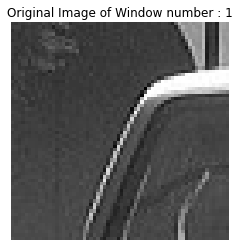

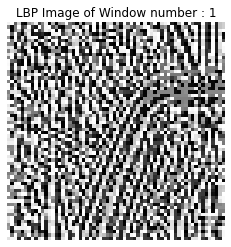

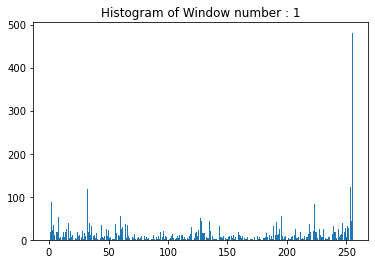

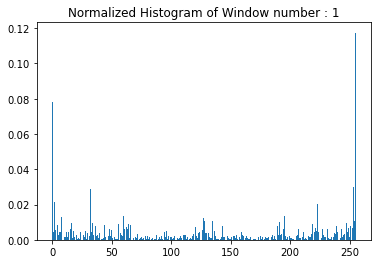

Window number :  2


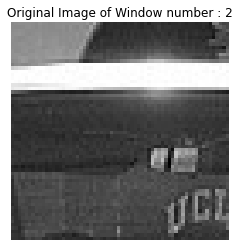

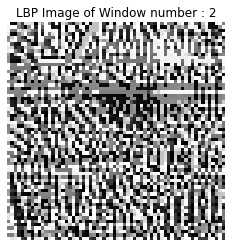

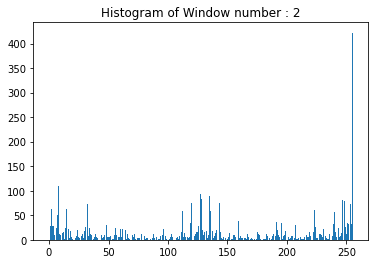

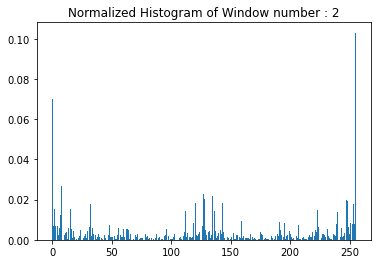

Window number :  3


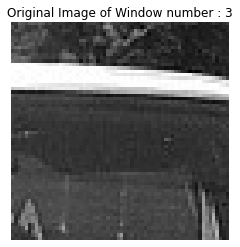

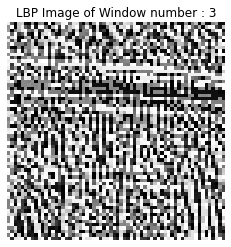

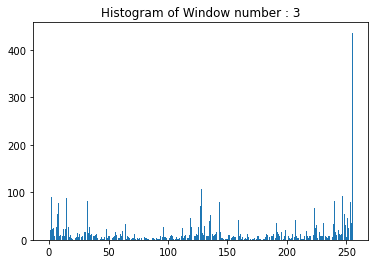

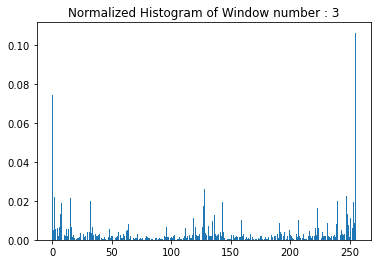

Window number :  4


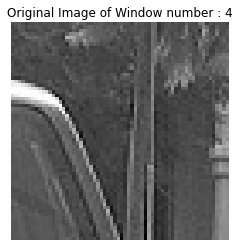

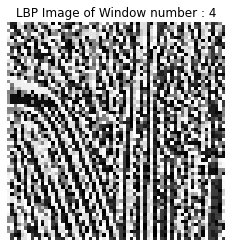

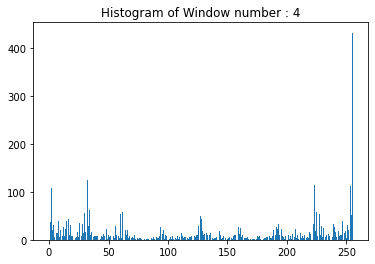

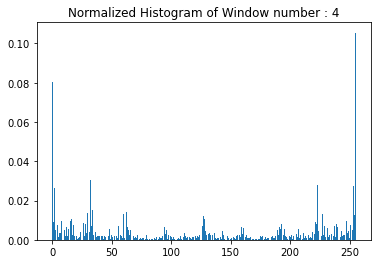

Window number :  5


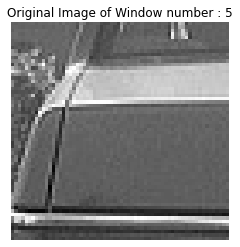

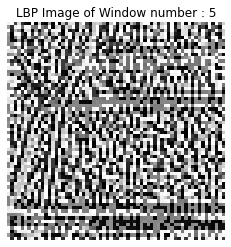

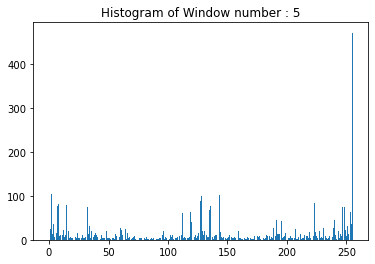

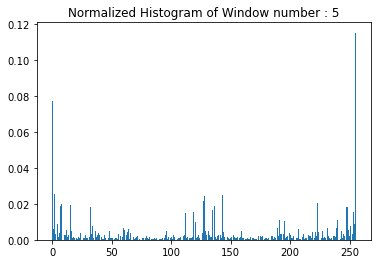

Window number :  6


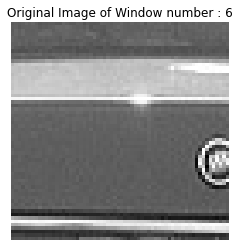

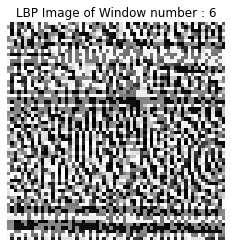

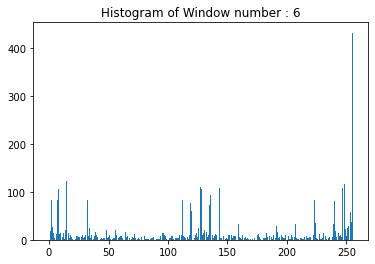

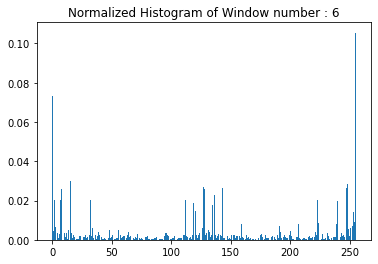

Window number :  7


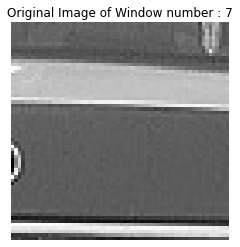

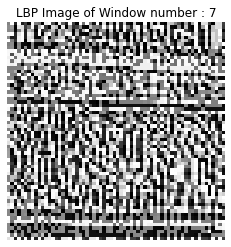

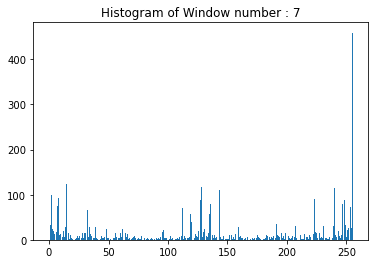

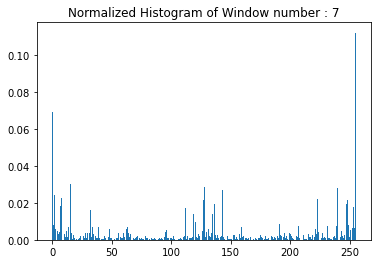

Window number :  8


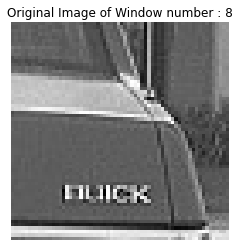

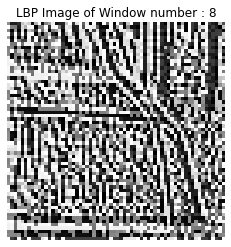

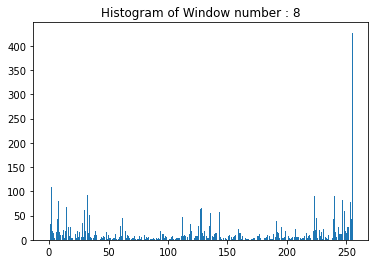

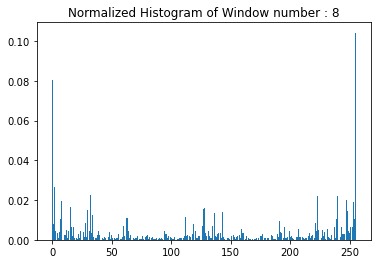

Window number :  9


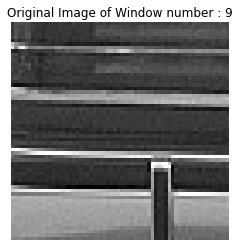

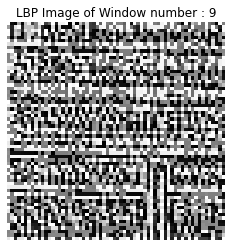

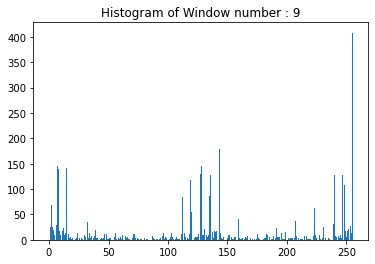

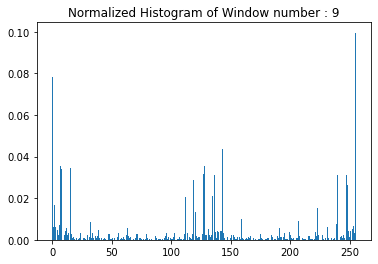

Window number :  10


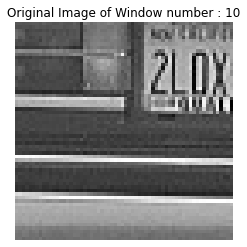

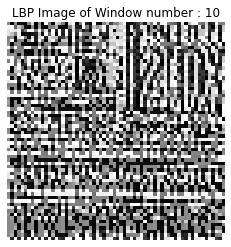

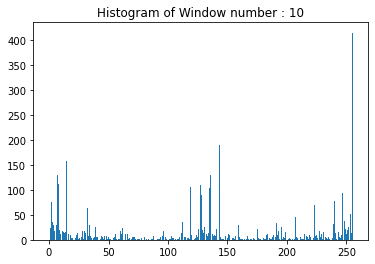

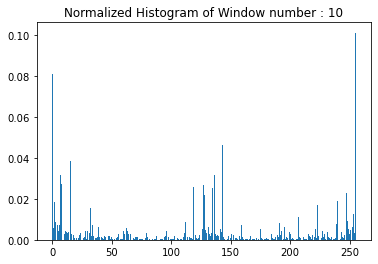

Window number :  11


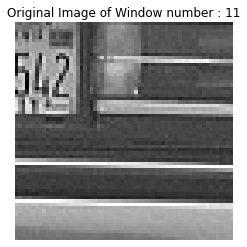

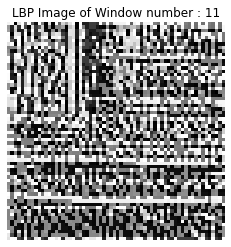

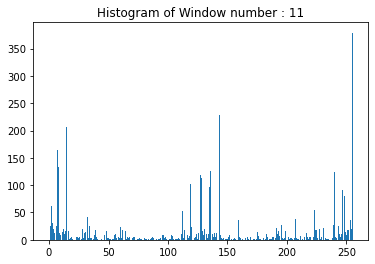

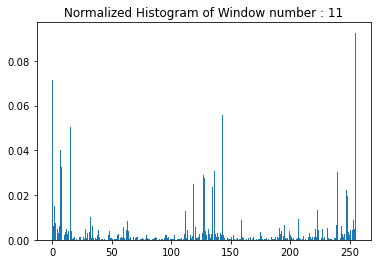

Window number :  12


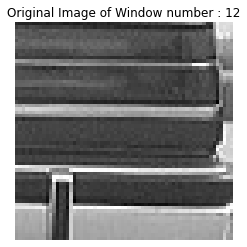

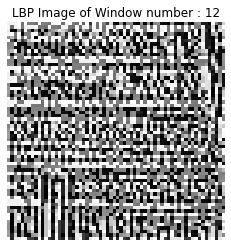

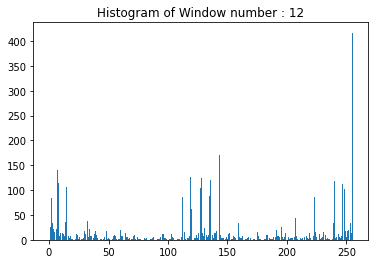

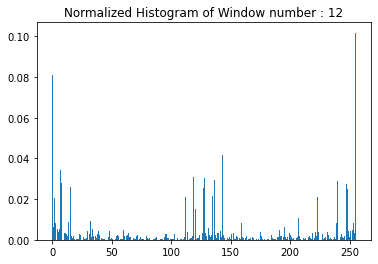

Window number :  13


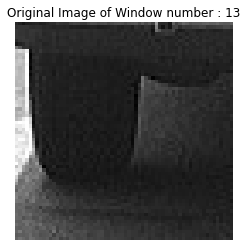

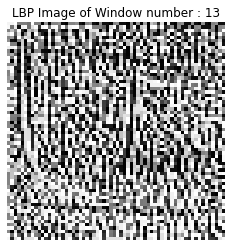

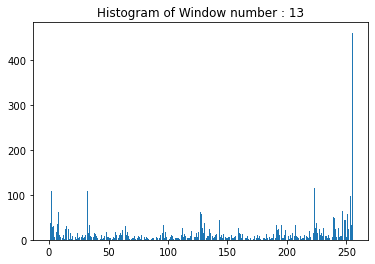

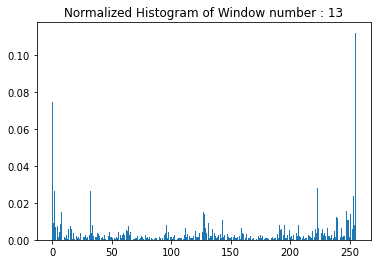

Window number :  14


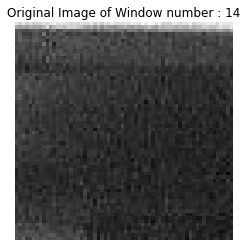

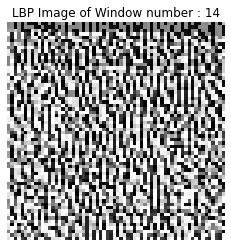

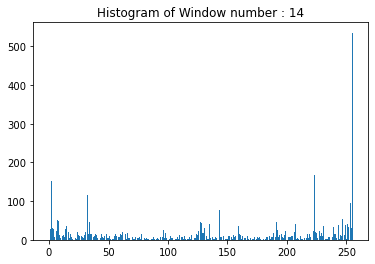

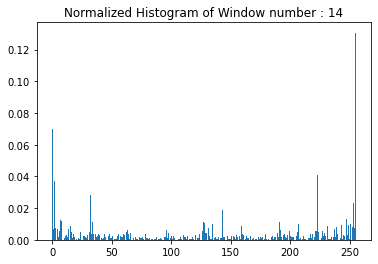

Window number :  15


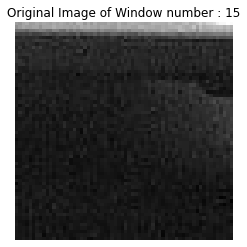

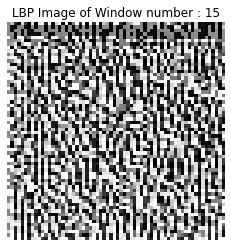

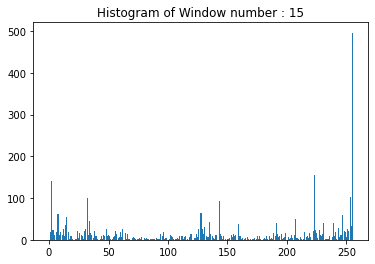

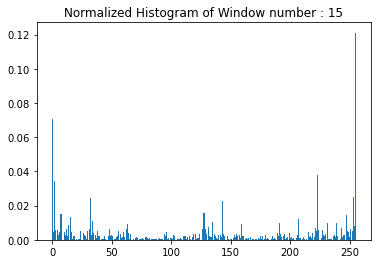

Window number :  16


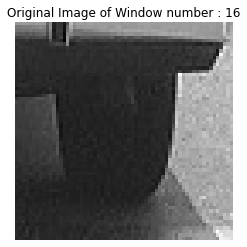

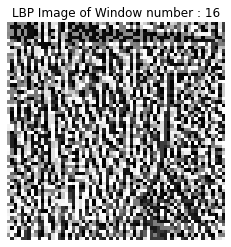

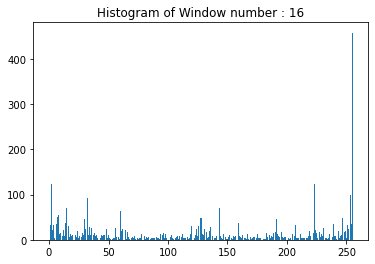

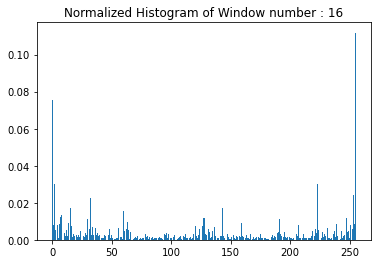

Window number :  1


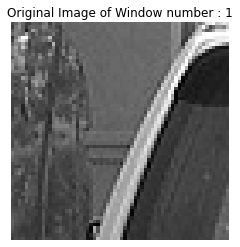

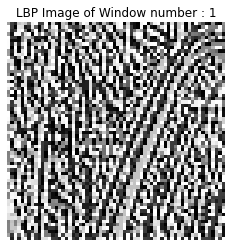

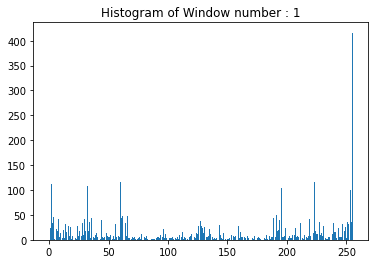

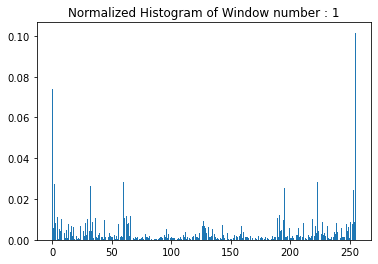

Window number :  2


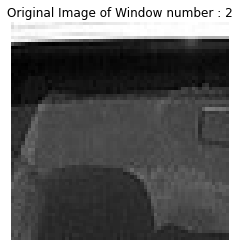

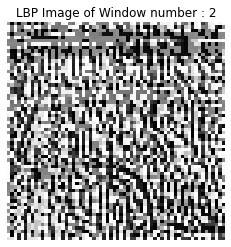

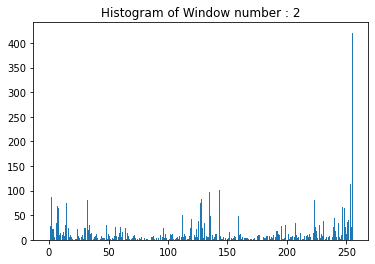

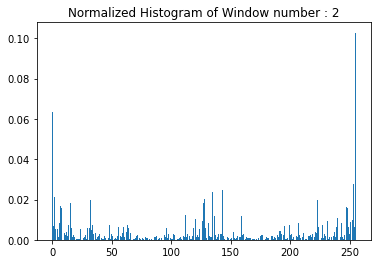

Window number :  3


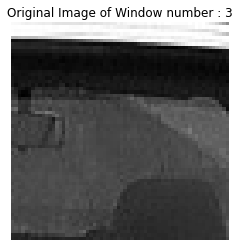

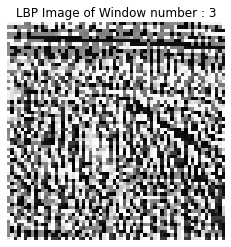

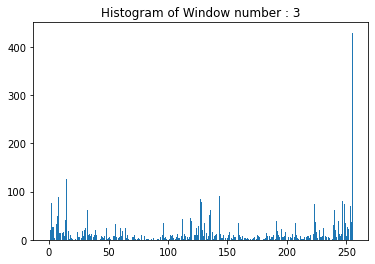

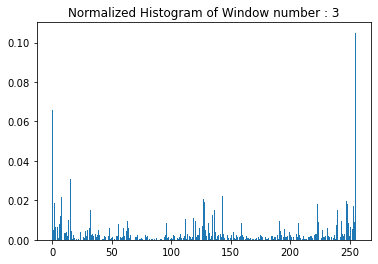

Window number :  4


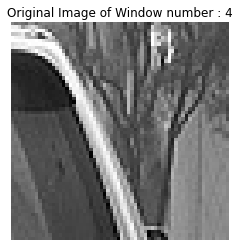

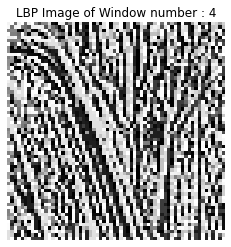

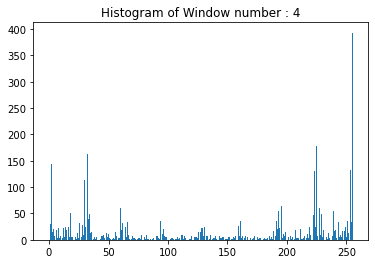

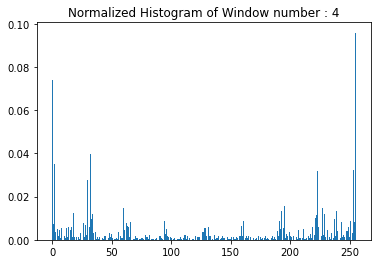

Window number :  5


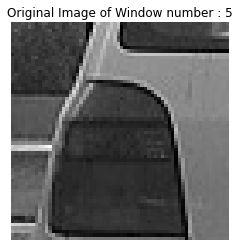

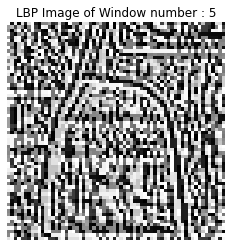

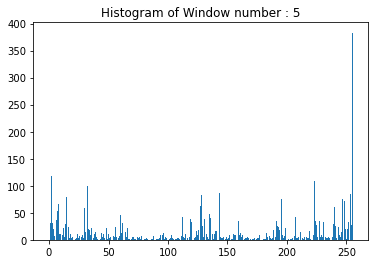

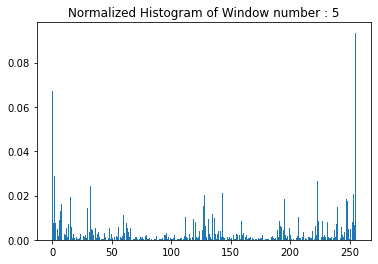

Window number :  6


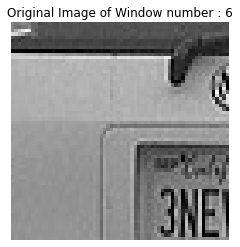

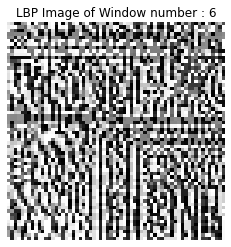

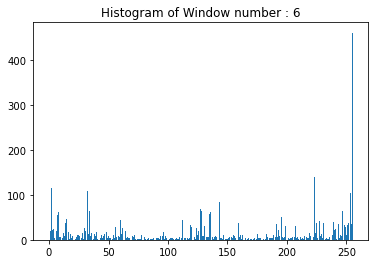

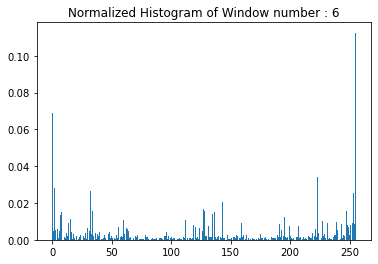

Window number :  7


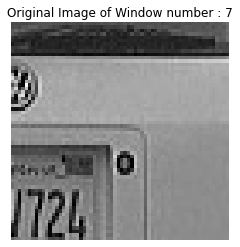

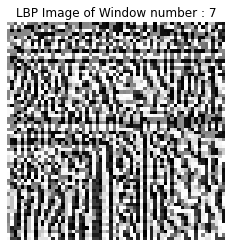

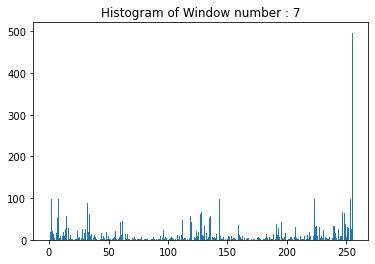

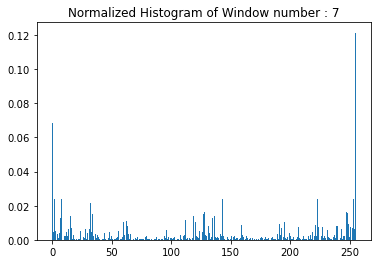

Window number :  8


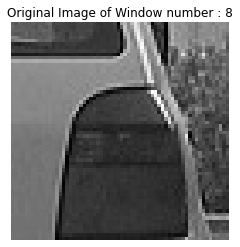

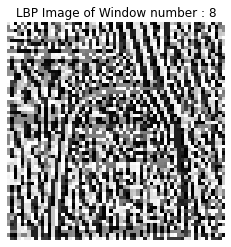

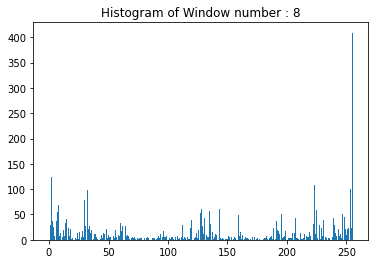

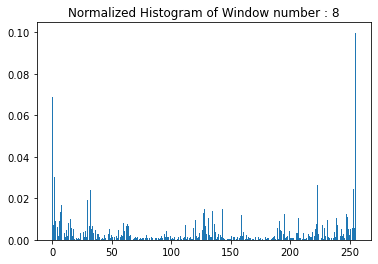

Window number :  9


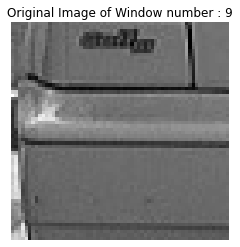

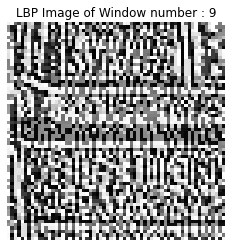

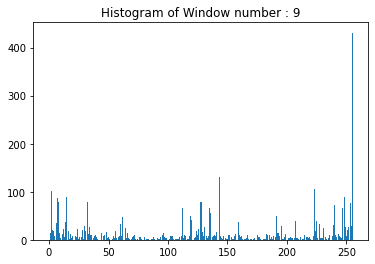

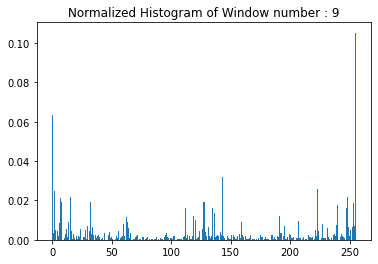

Window number :  10


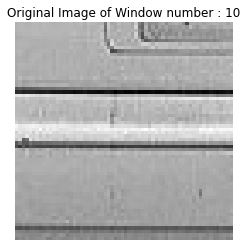

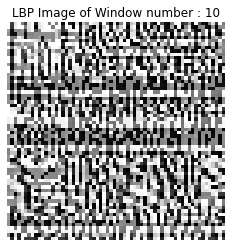

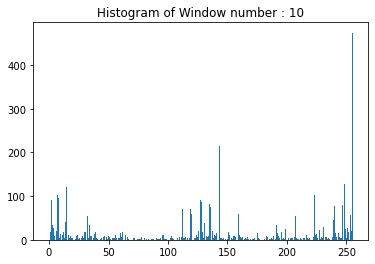

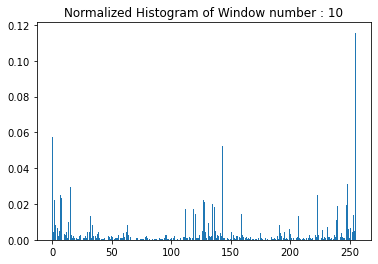

Window number :  11


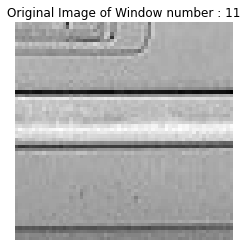

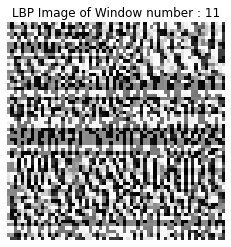

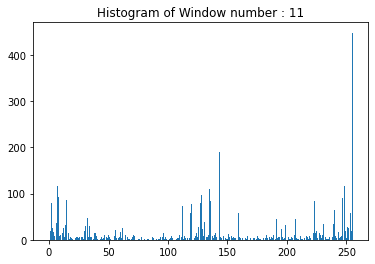

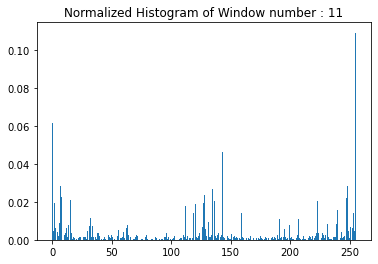

Window number :  12


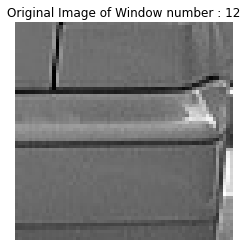

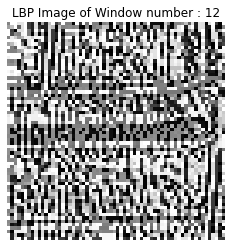

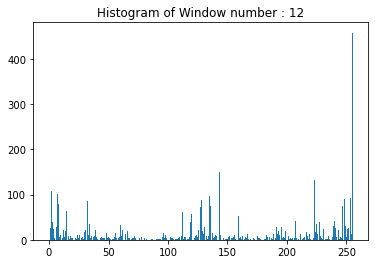

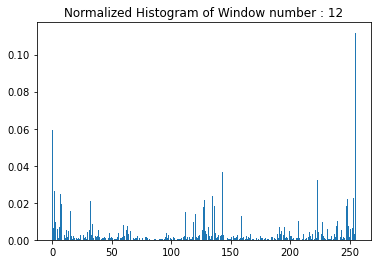

Window number :  13


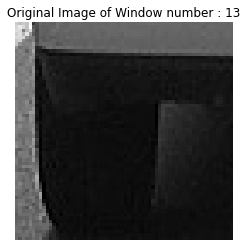

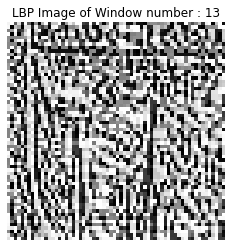

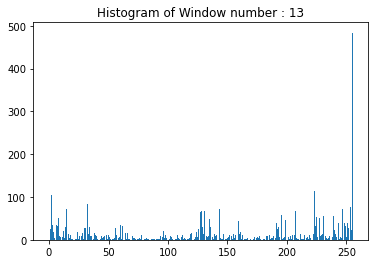

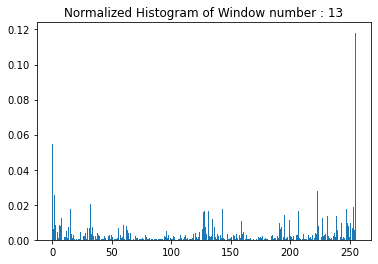

Window number :  14


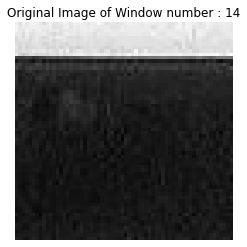

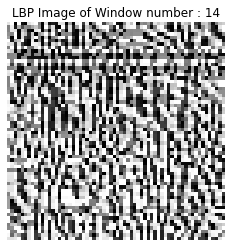

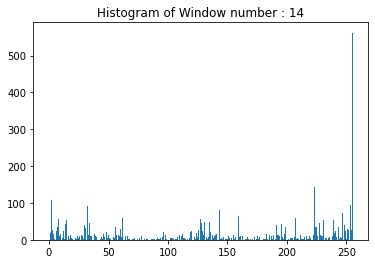

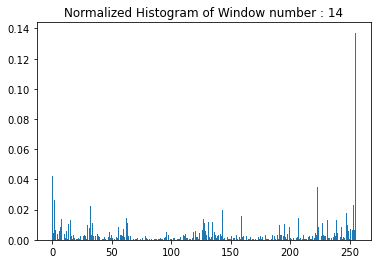

Window number :  15


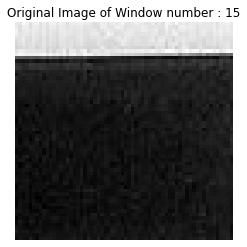

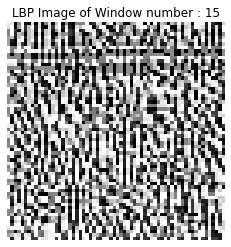

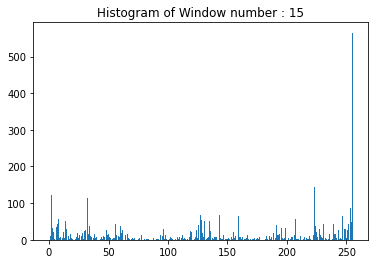

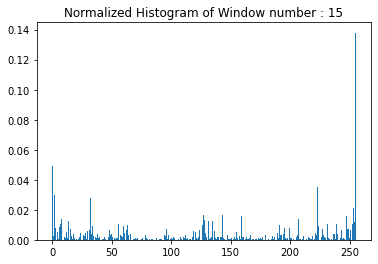

Window number :  16


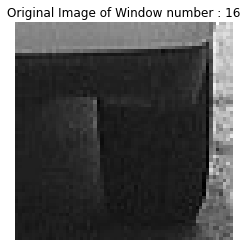

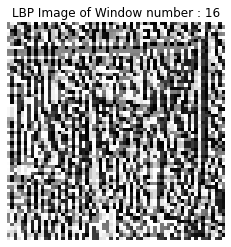

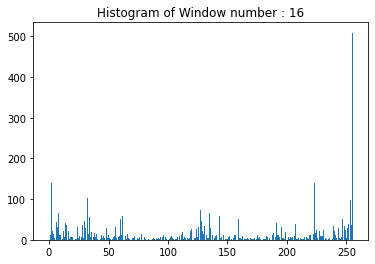

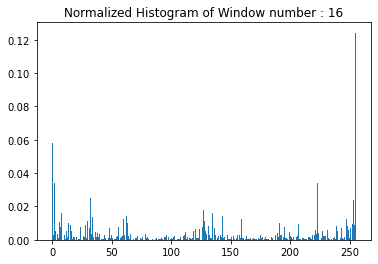

Window number :  1


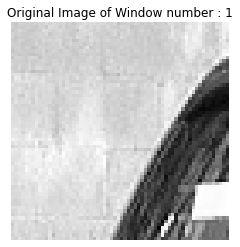

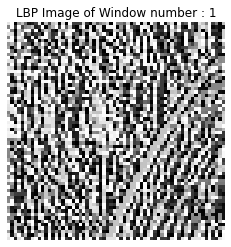

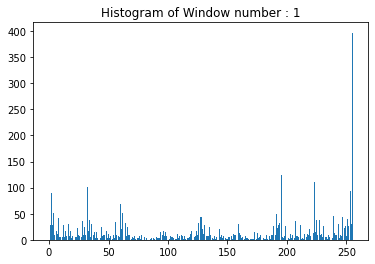

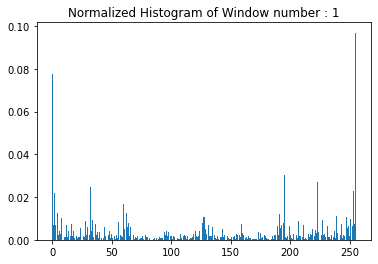

Window number :  2


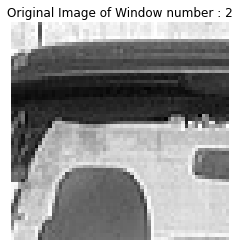

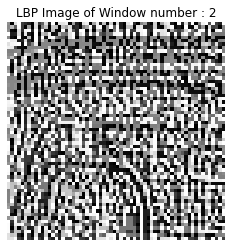

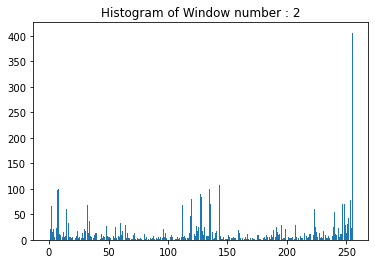

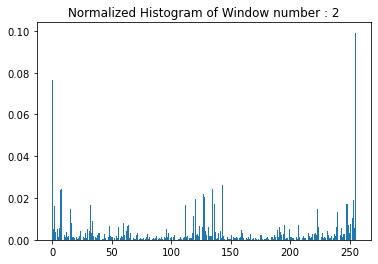

Window number :  3


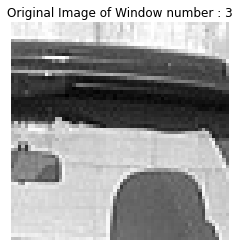

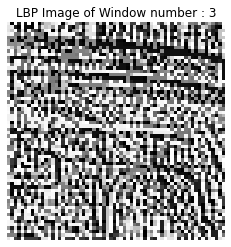

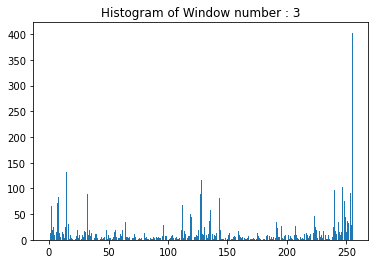

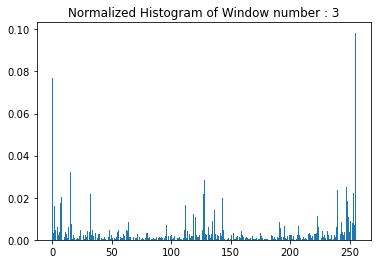

Window number :  4


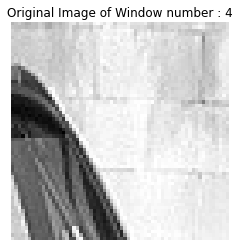

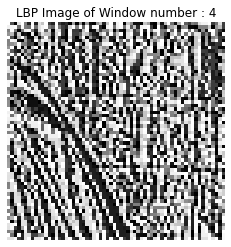

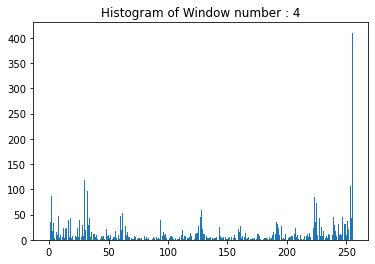

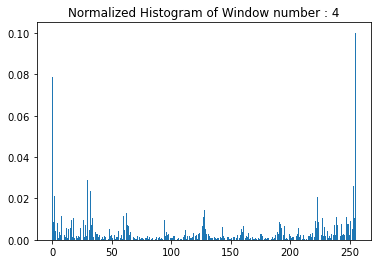

Window number :  5


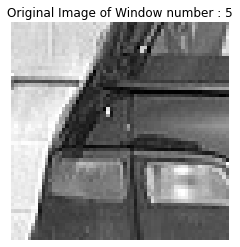

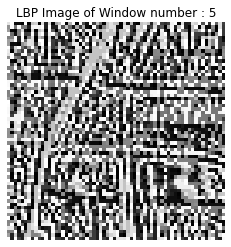

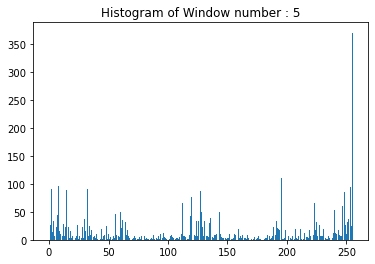

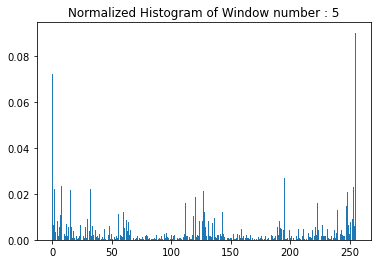

Window number :  6


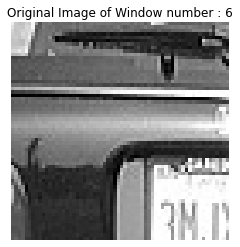

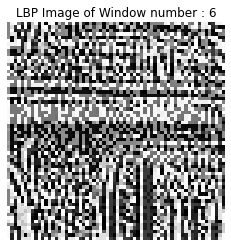

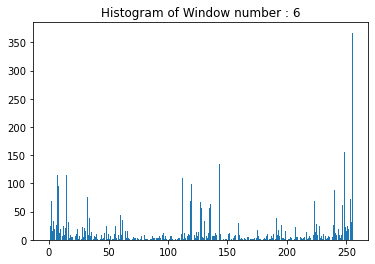

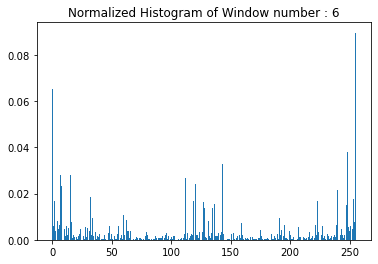

Window number :  7


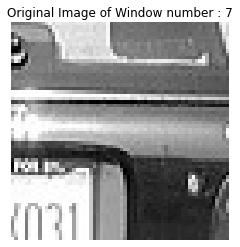

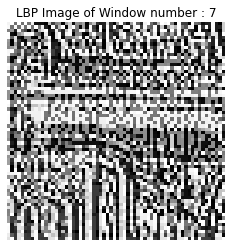

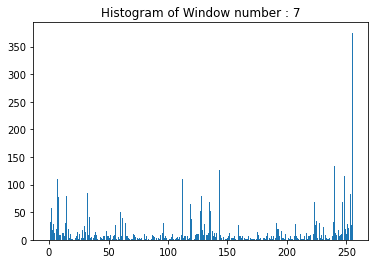

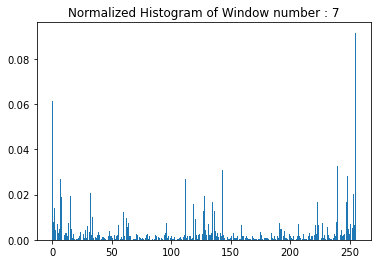

Window number :  8


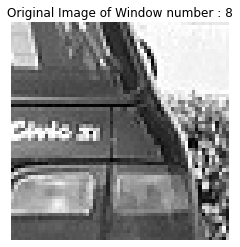

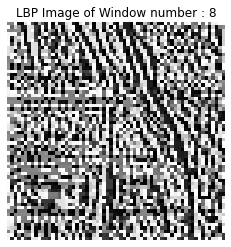

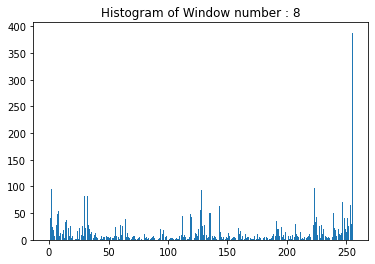

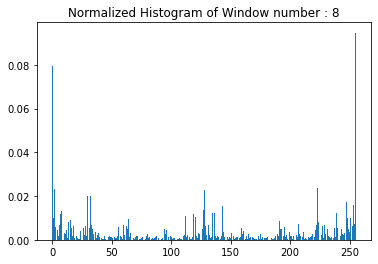

Window number :  9


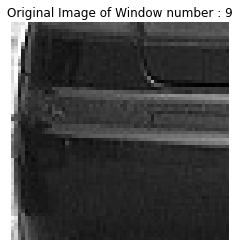

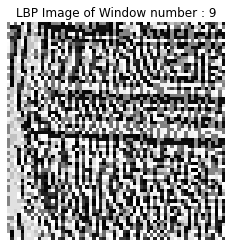

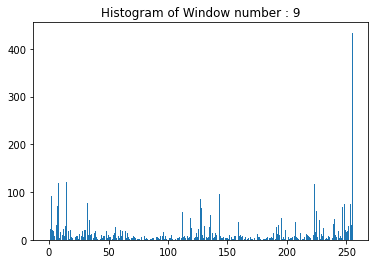

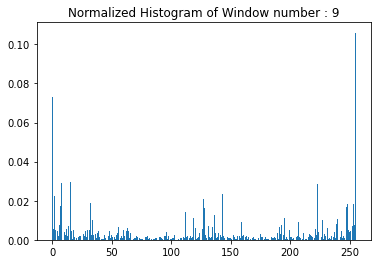

Window number :  10


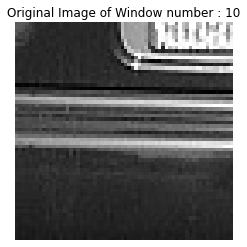

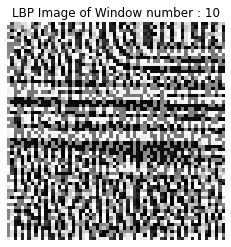

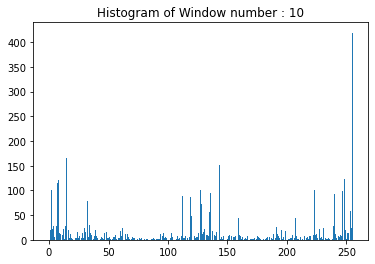

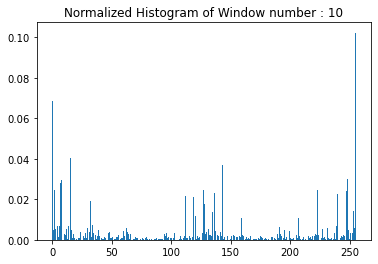

Window number :  11


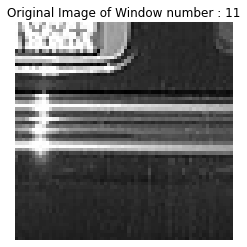

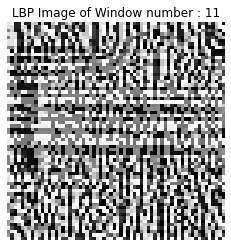

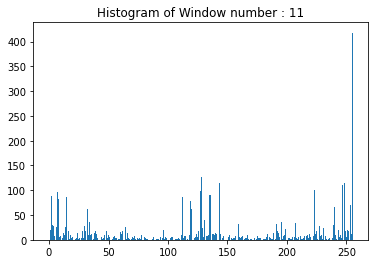

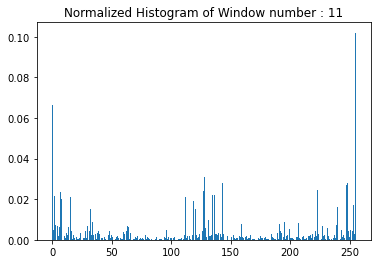

Window number :  12


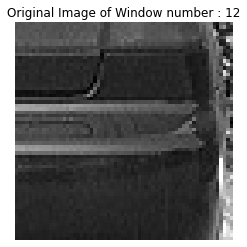

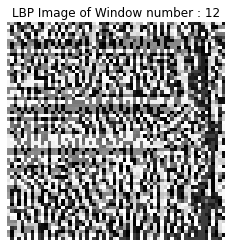

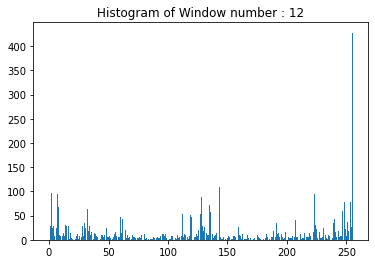

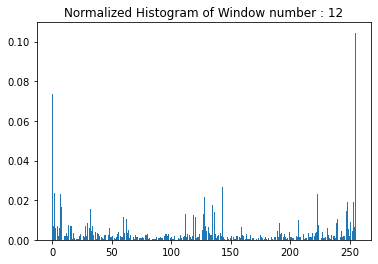

Window number :  13


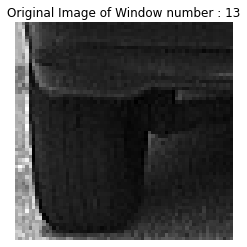

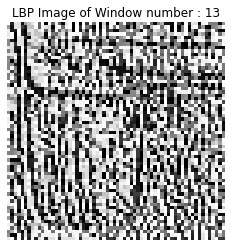

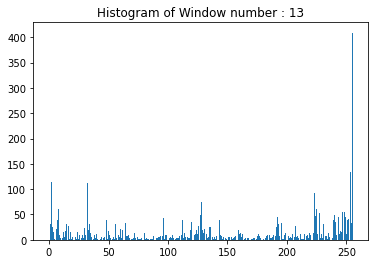

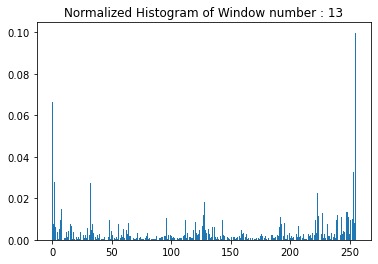

Window number :  14


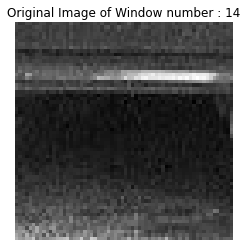

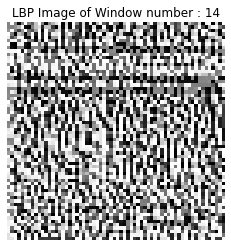

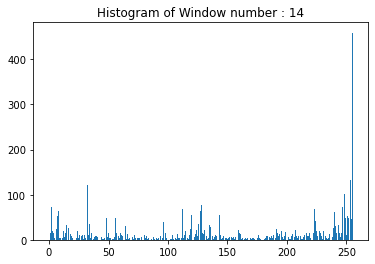

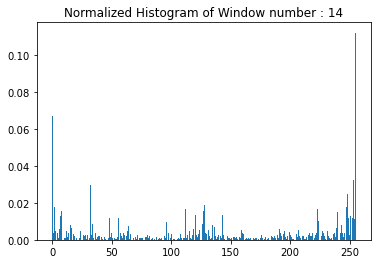

Window number :  15


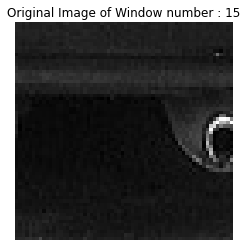

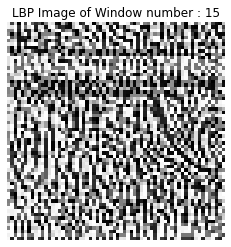

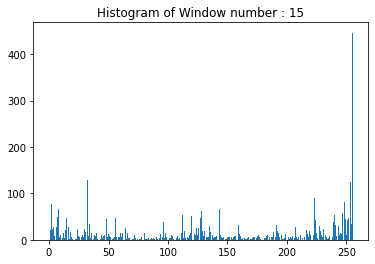

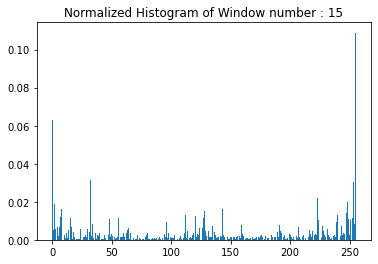

Window number :  16


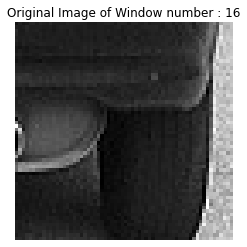

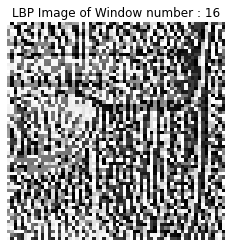

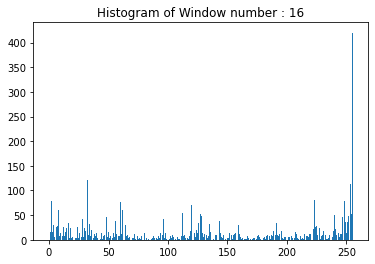

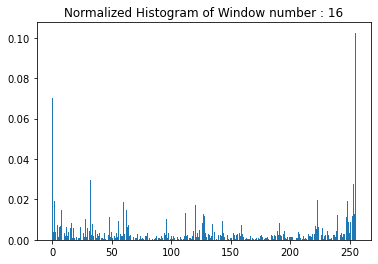

Window number :  1


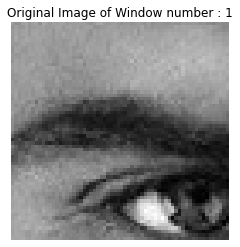

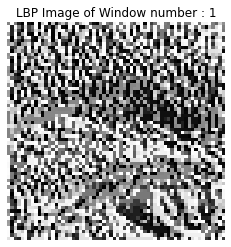

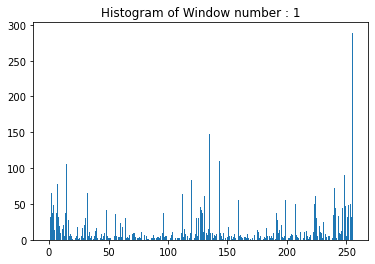

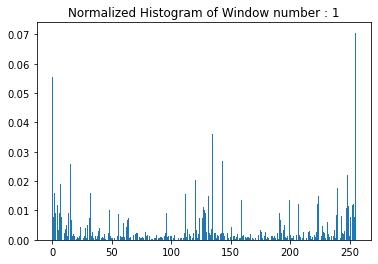

Window number :  2


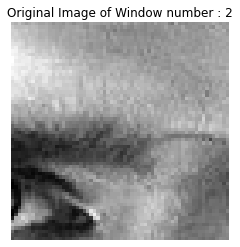

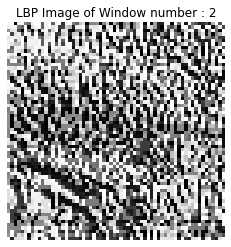

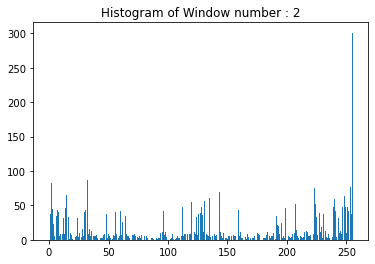

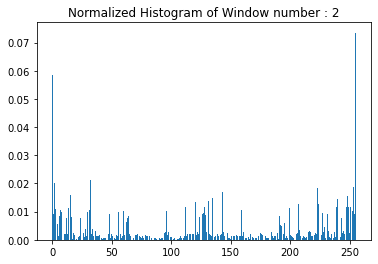

Window number :  3


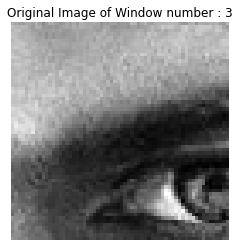

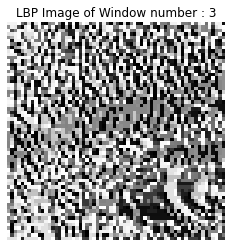

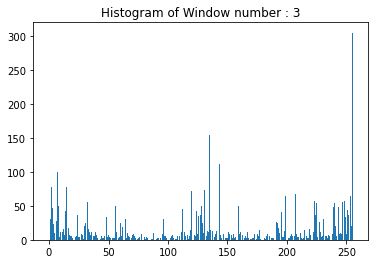

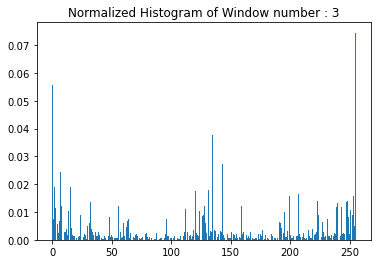

Window number :  4


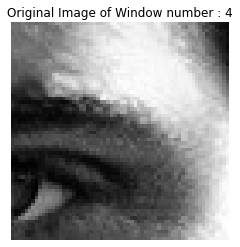

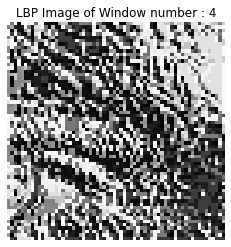

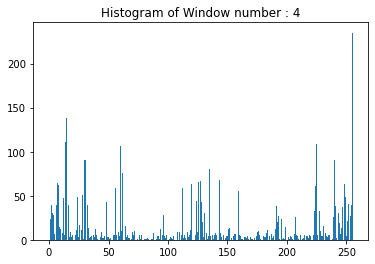

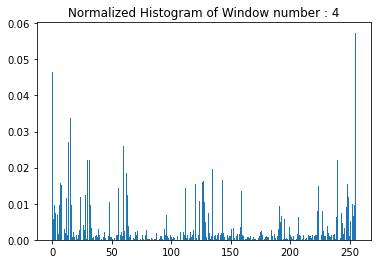

Window number :  5


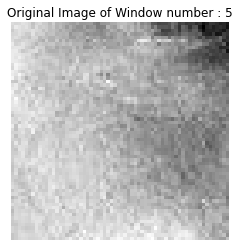

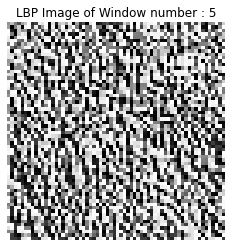

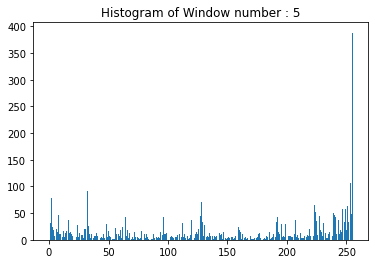

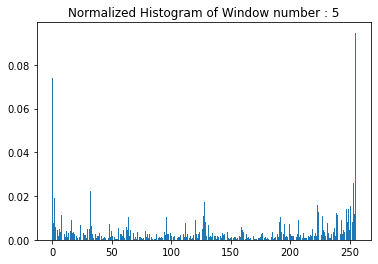

Window number :  6


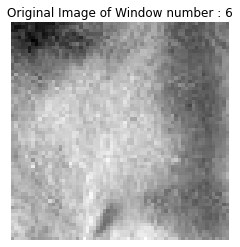

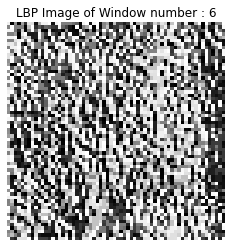

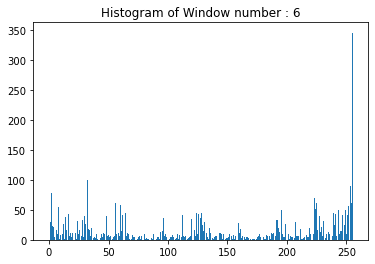

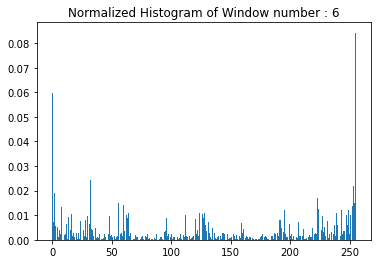

Window number :  7


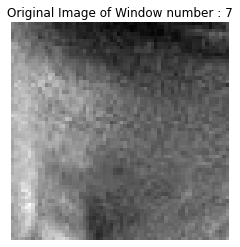

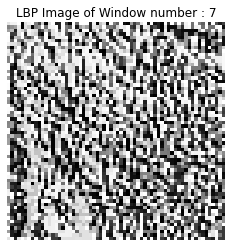

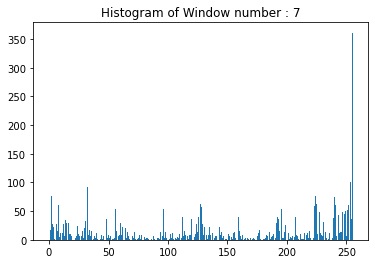

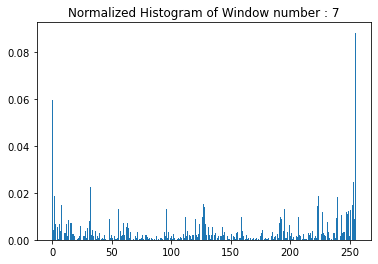

Window number :  8


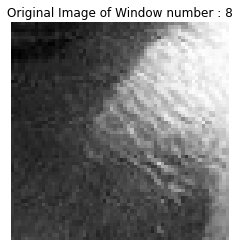

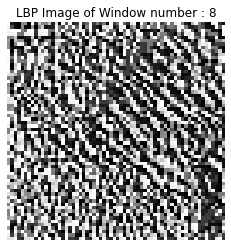

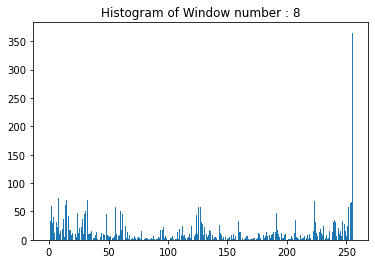

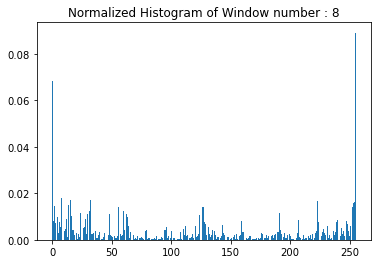

Window number :  9


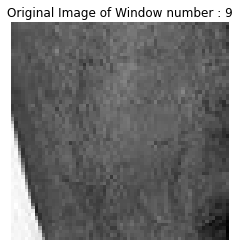

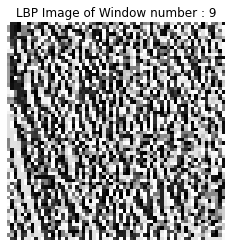

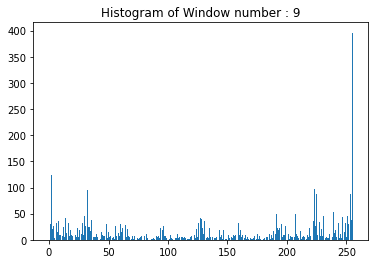

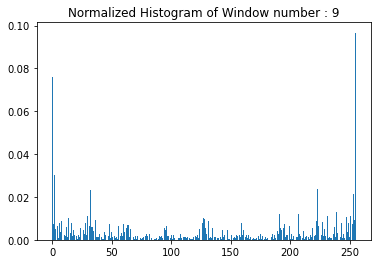

Window number :  10


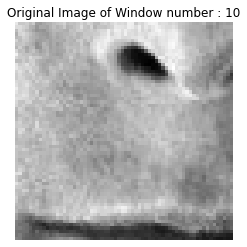

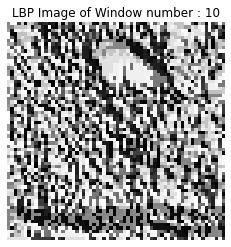

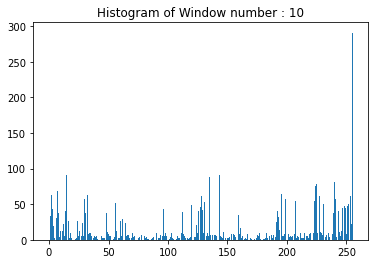

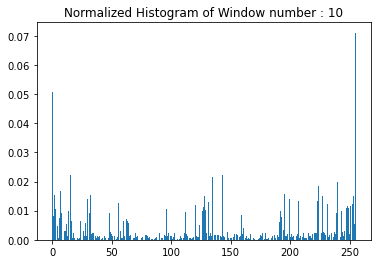

Window number :  11


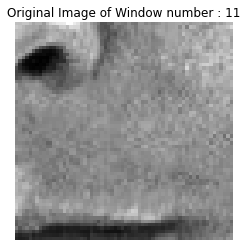

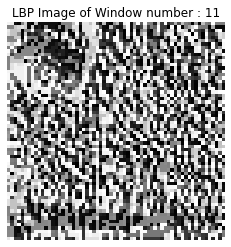

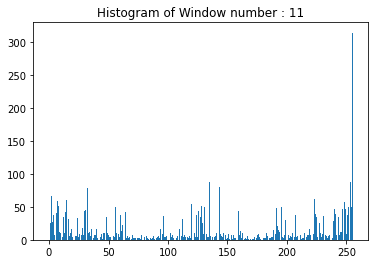

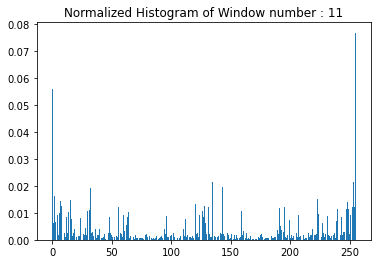

Window number :  12


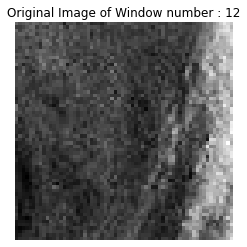

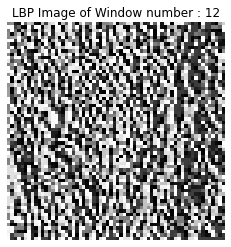

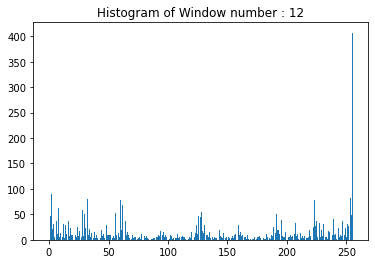

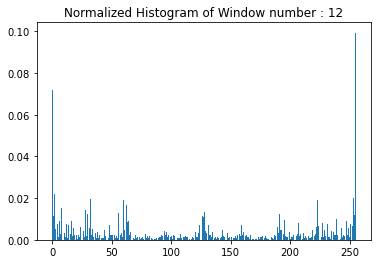

Window number :  13


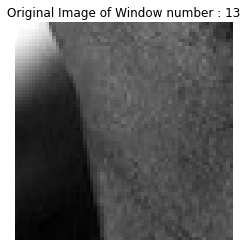

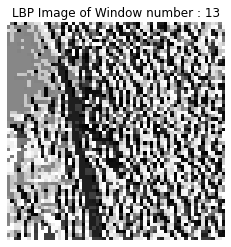

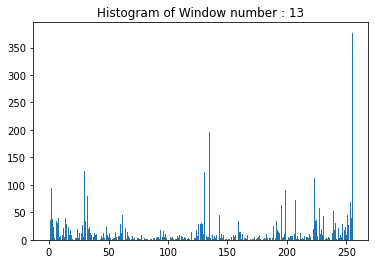

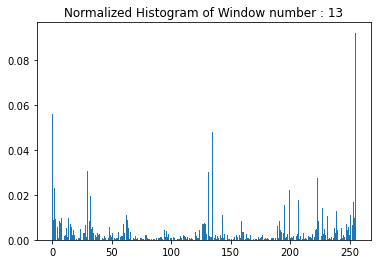

Window number :  14


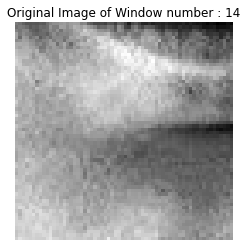

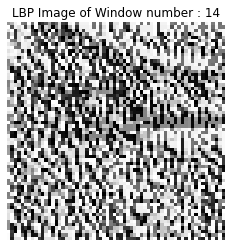

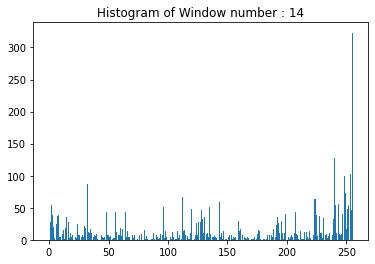

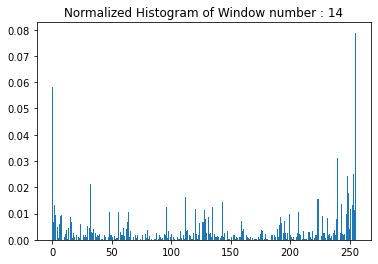

Window number :  15


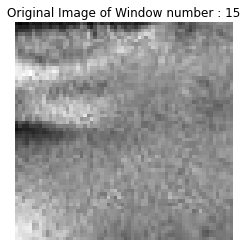

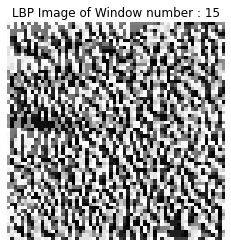

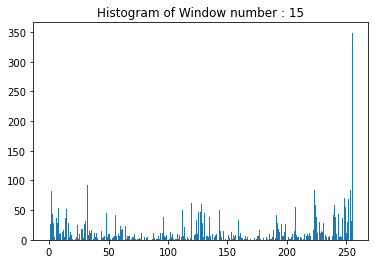

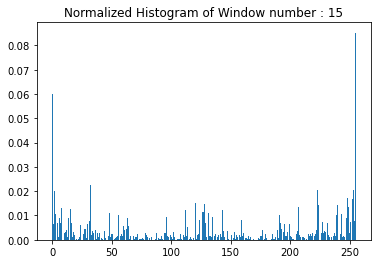

Window number :  16


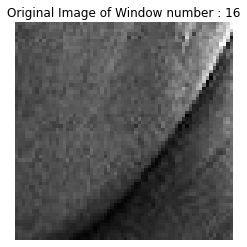

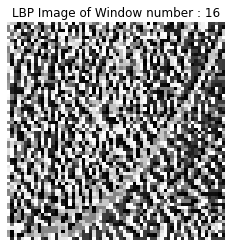

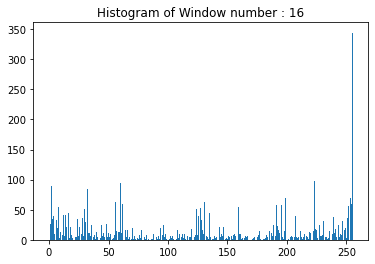

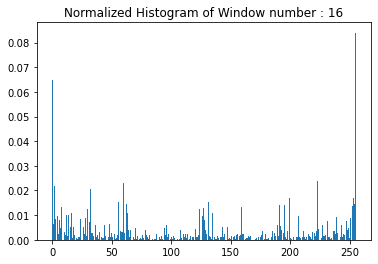

Window number :  1


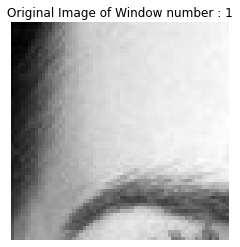

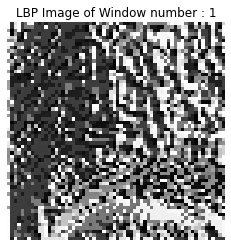

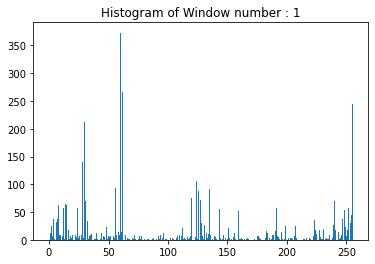

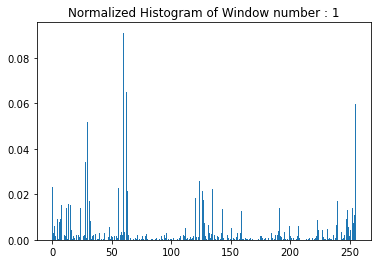

Window number :  2


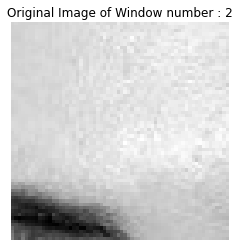

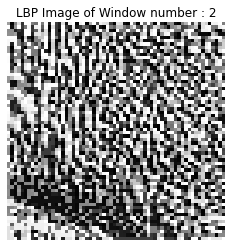

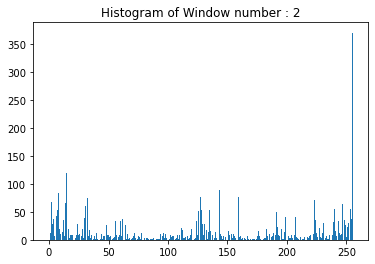

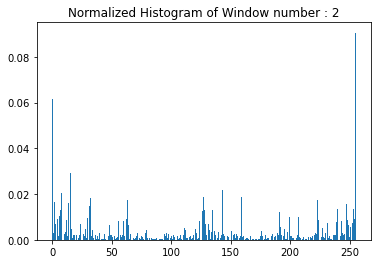

Window number :  3


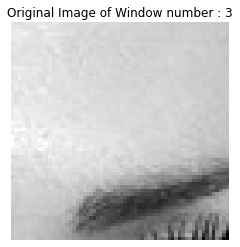

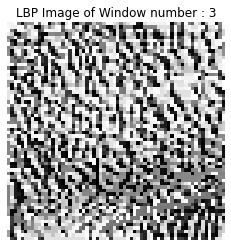

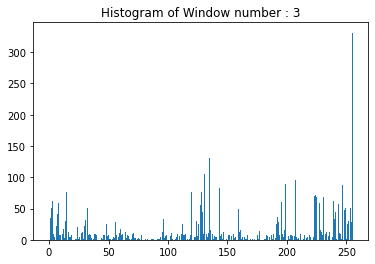

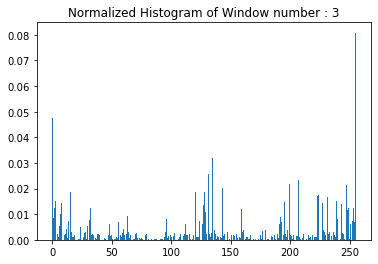

Window number :  4


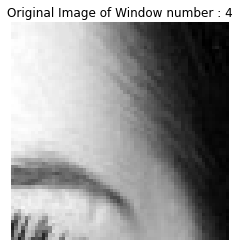

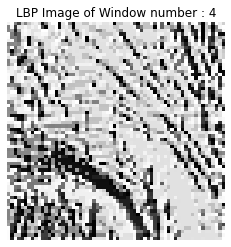

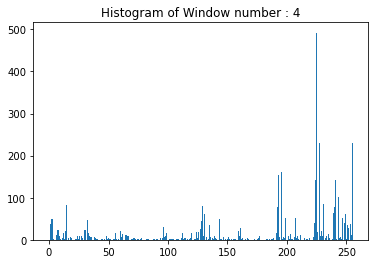

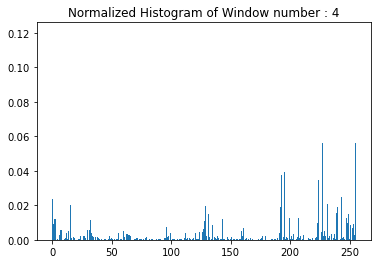

Window number :  5


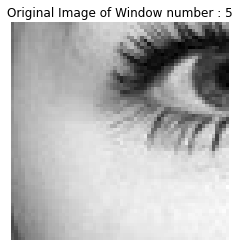

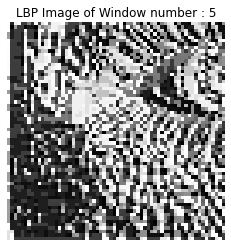

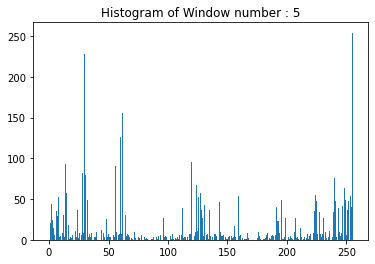

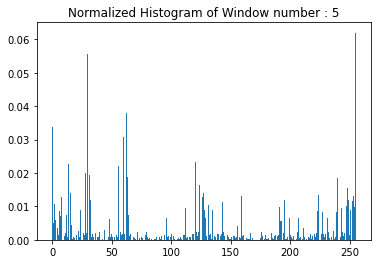

Window number :  6


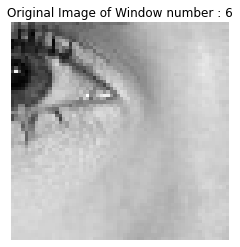

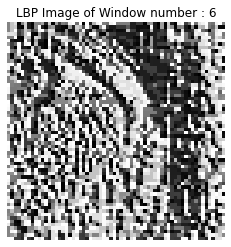

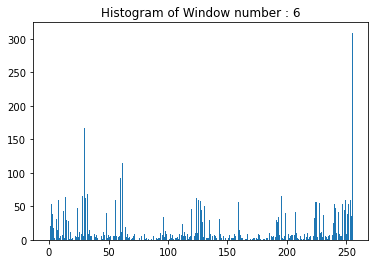

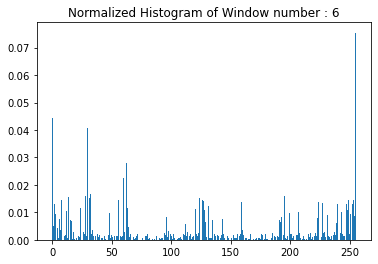

Window number :  7


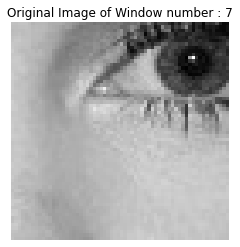

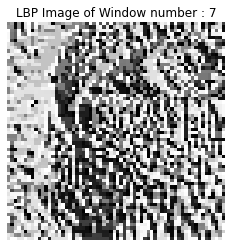

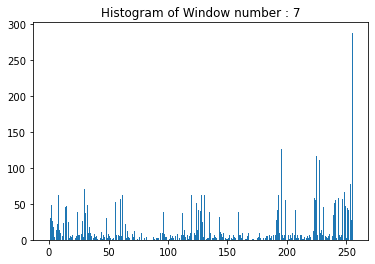

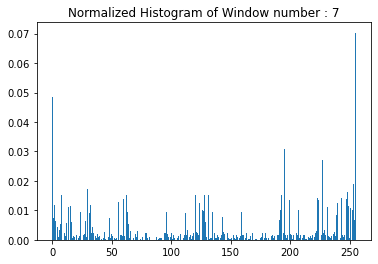

Window number :  8


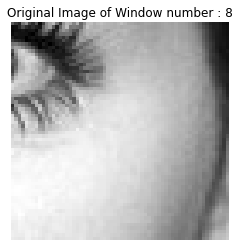

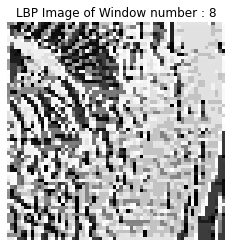

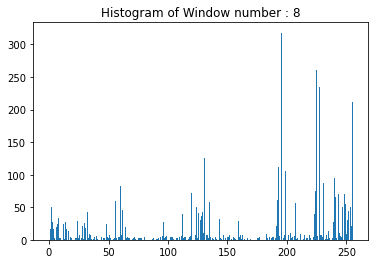

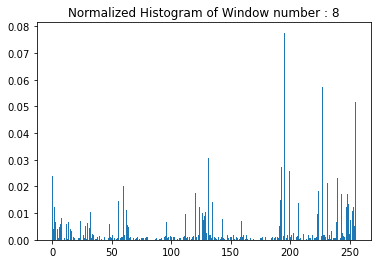

Window number :  9


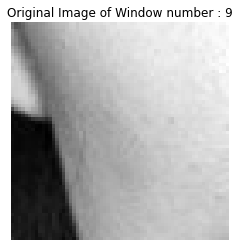

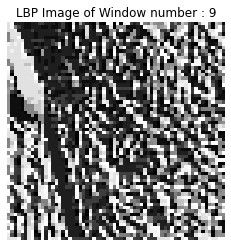

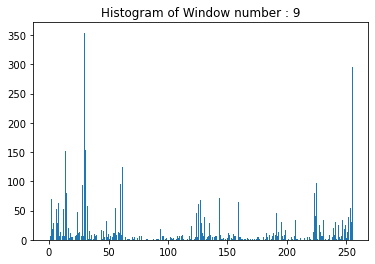

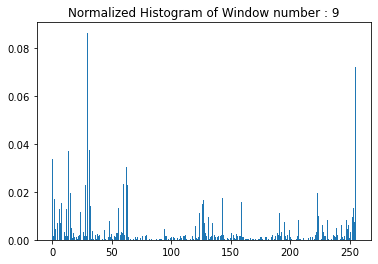

Window number :  10


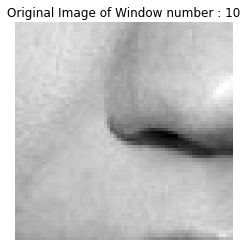

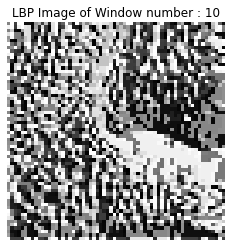

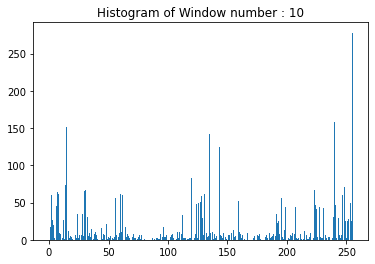

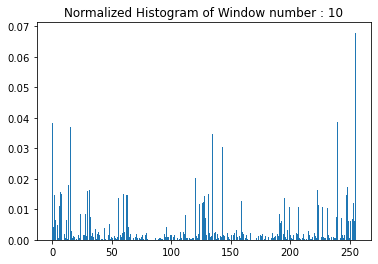

Window number :  11


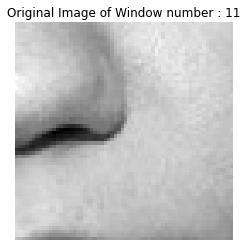

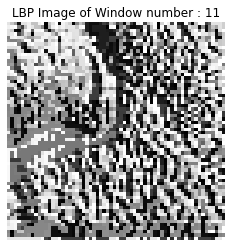

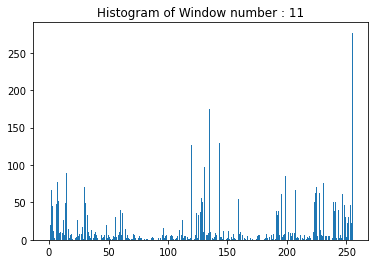

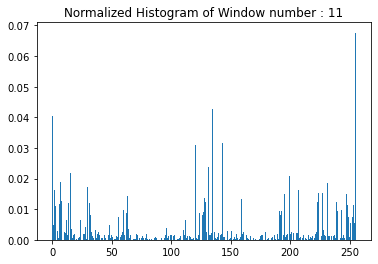

Window number :  12


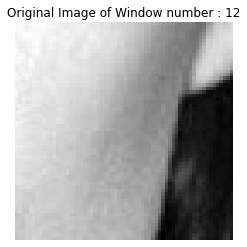

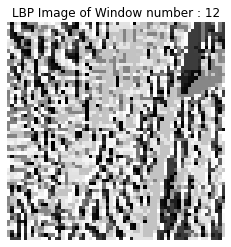

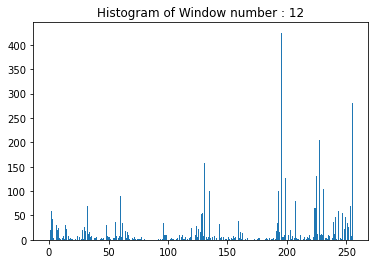

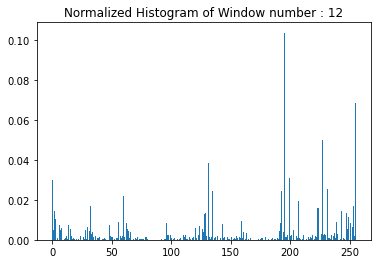

Window number :  13


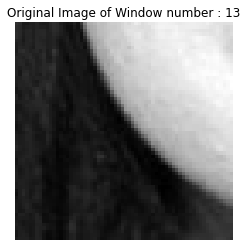

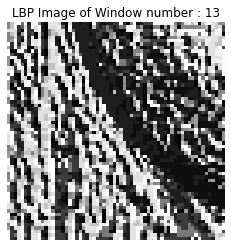

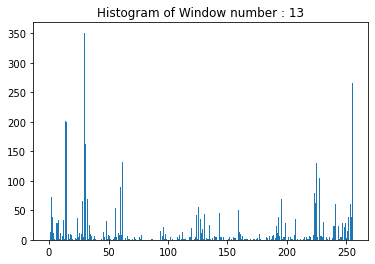

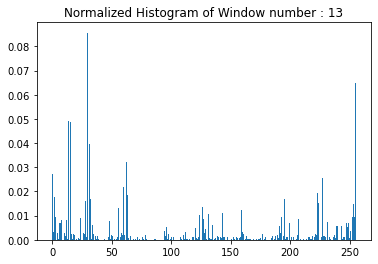

Window number :  14


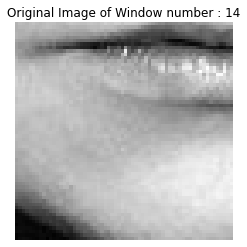

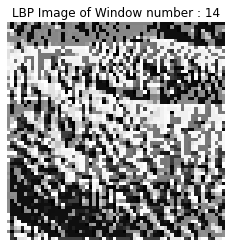

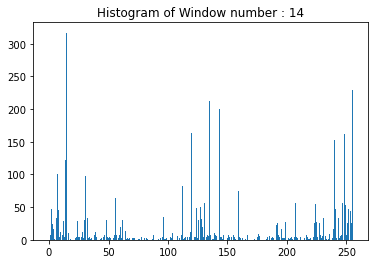

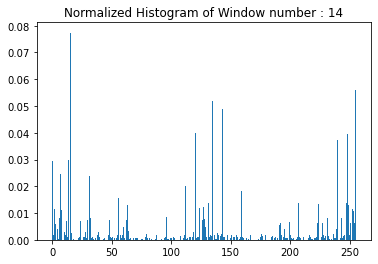

Window number :  15


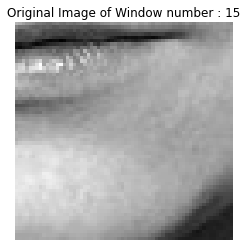

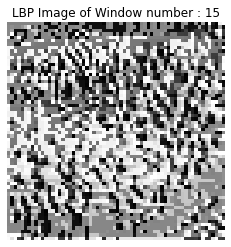

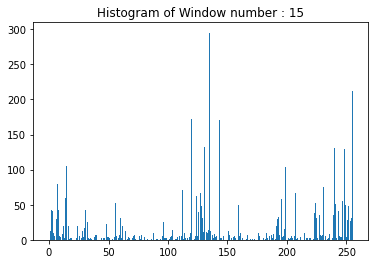

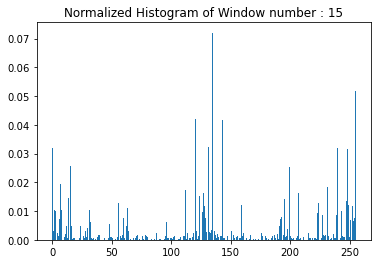

Window number :  16


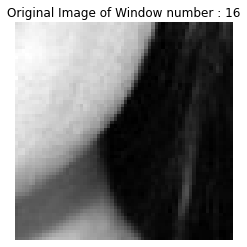

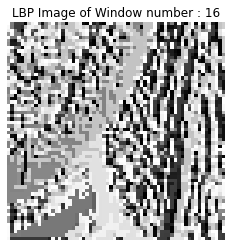

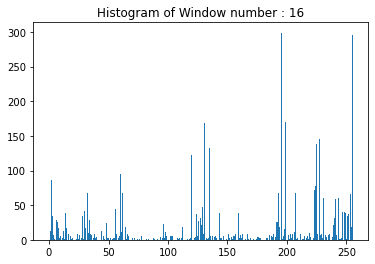

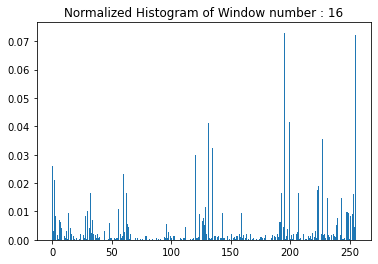

Window number :  1


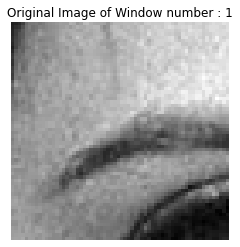

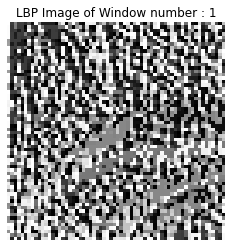

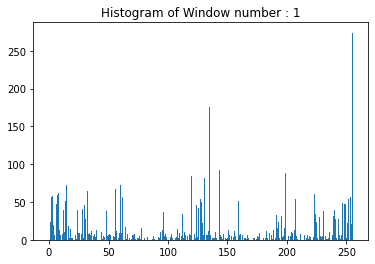

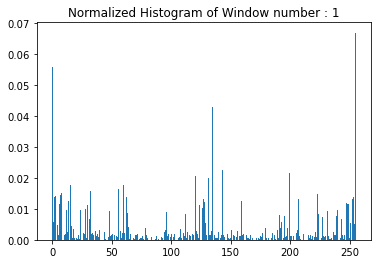

Window number :  2


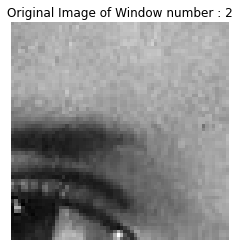

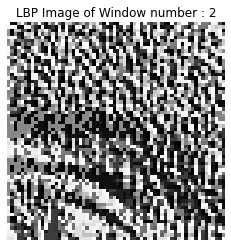

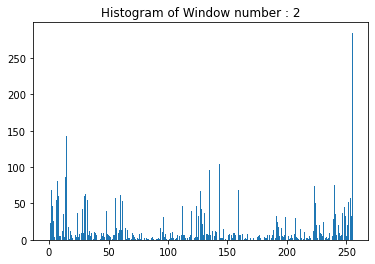

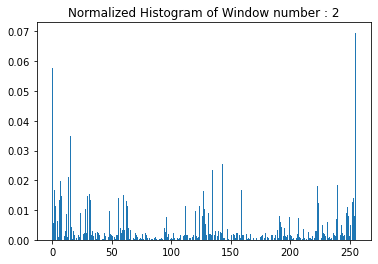

Window number :  3


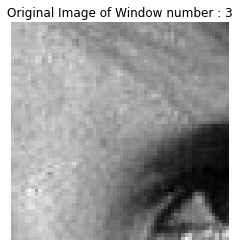

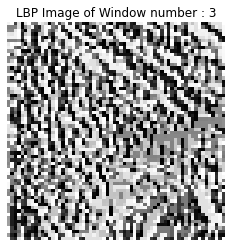

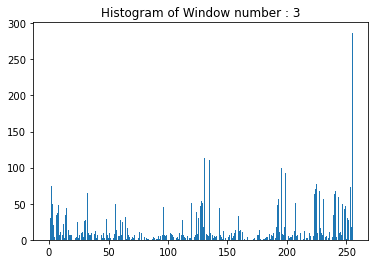

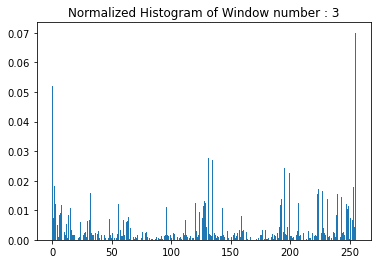

Window number :  4


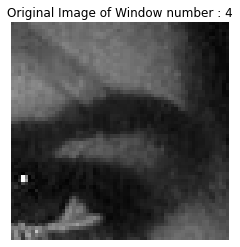

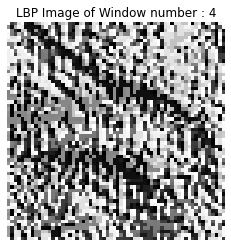

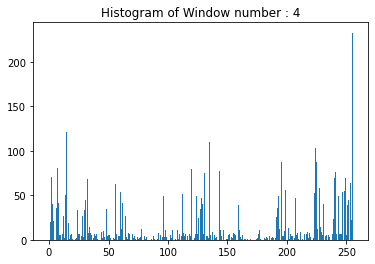

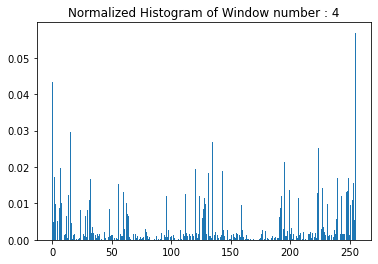

Window number :  5


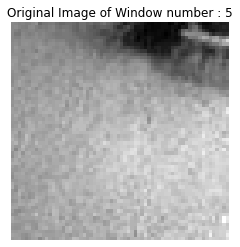

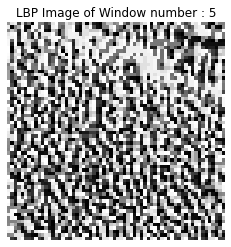

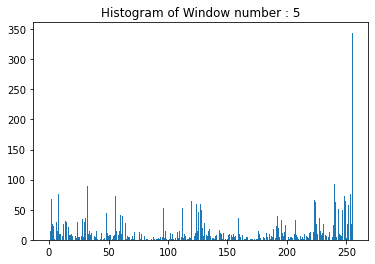

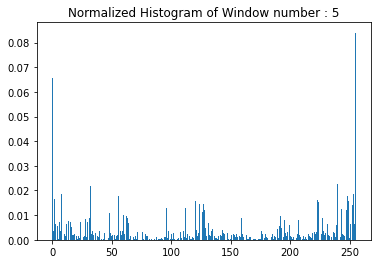

Window number :  6


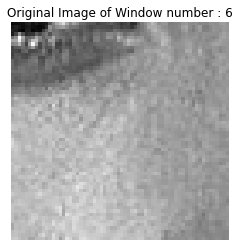

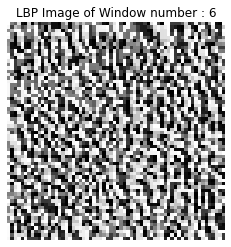

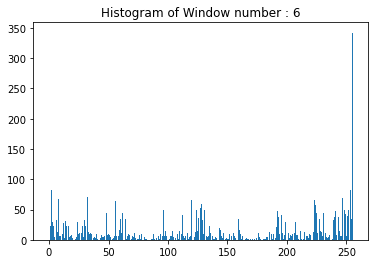

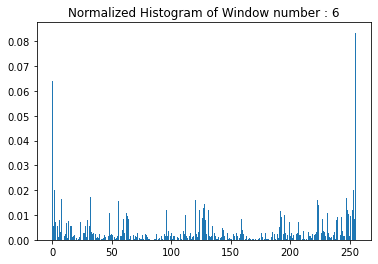

Window number :  7


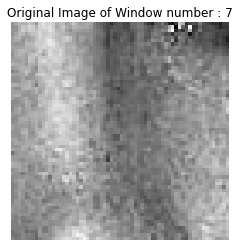

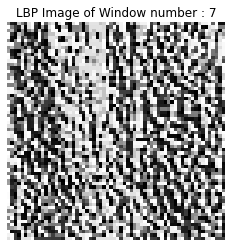

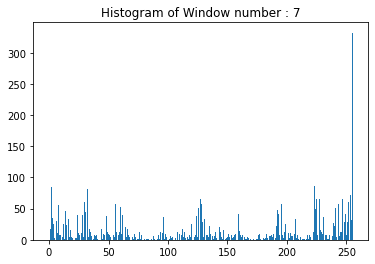

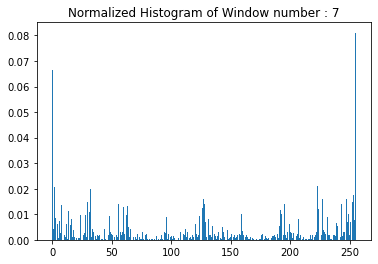

Window number :  8


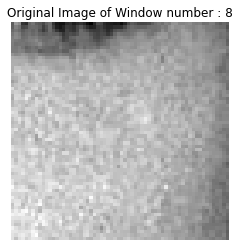

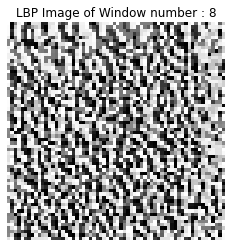

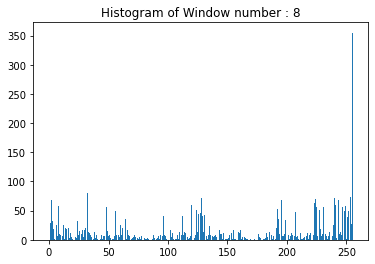

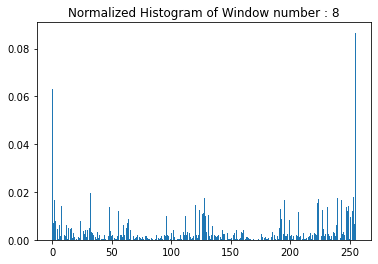

Window number :  9


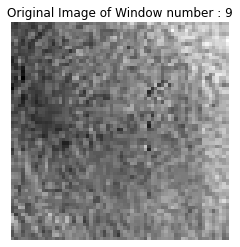

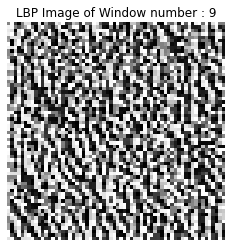

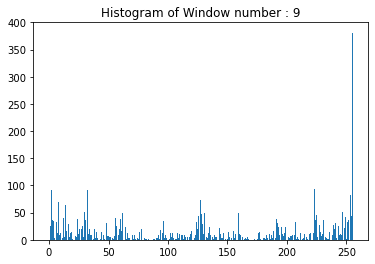

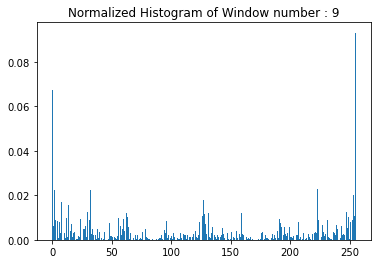

Window number :  10


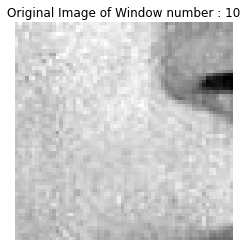

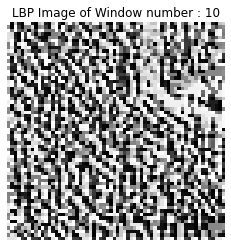

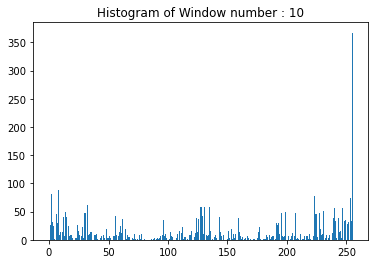

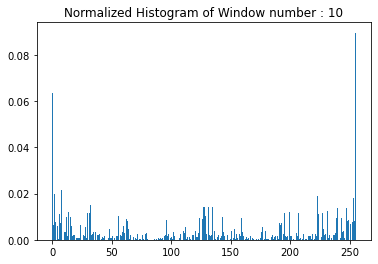

Window number :  11


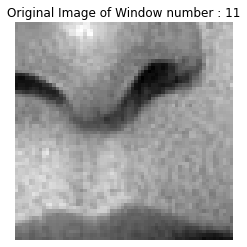

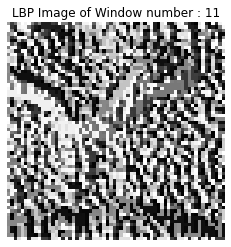

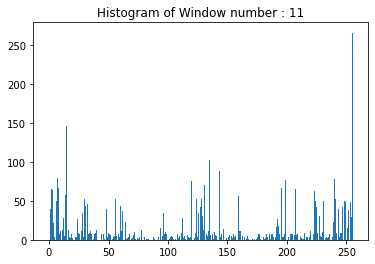

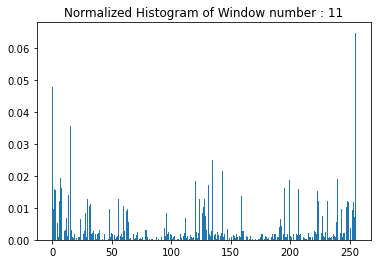

Window number :  12


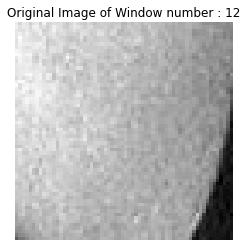

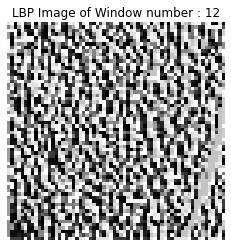

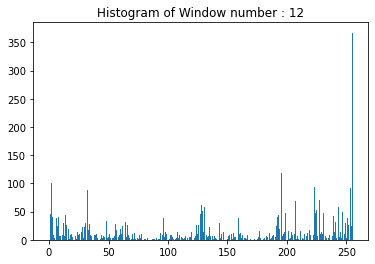

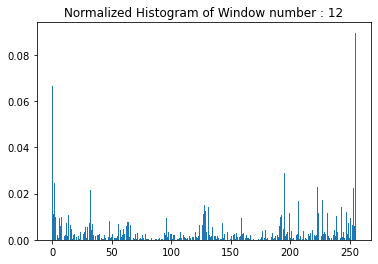

Window number :  13


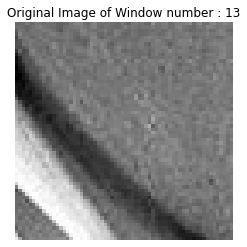

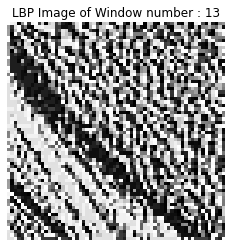

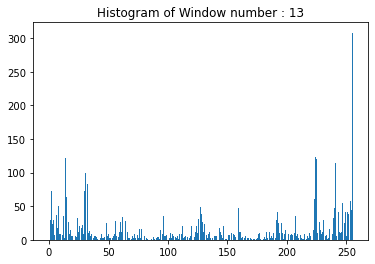

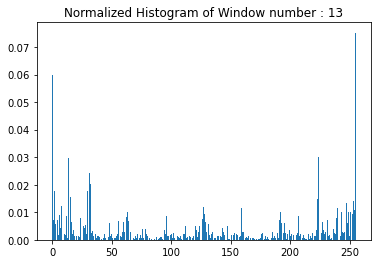

Window number :  14


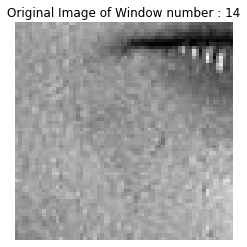

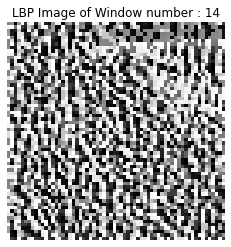

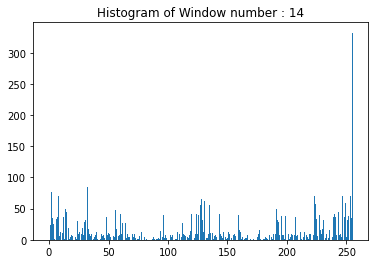

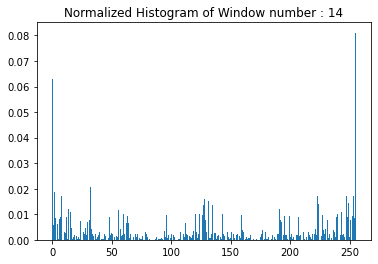

Window number :  15


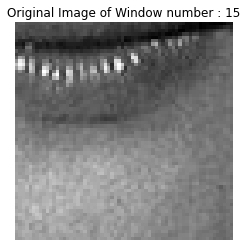

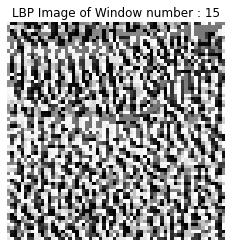

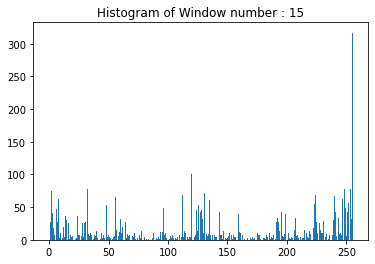

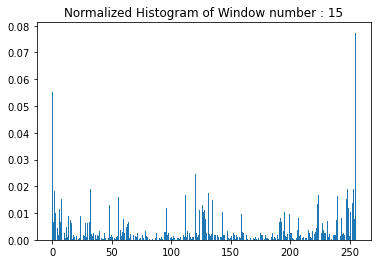

Window number :  16


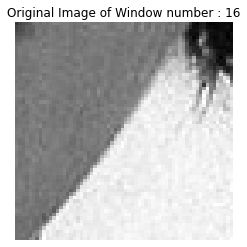

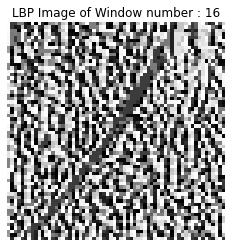

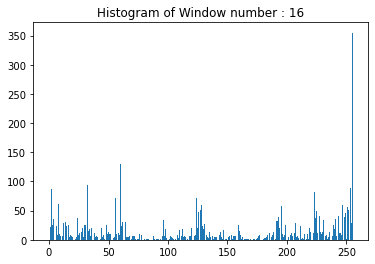

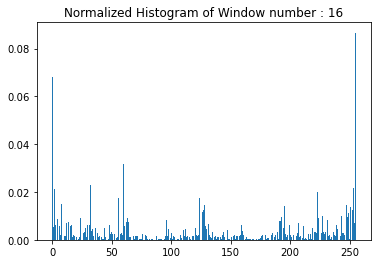

In [12]:
for image in images:
    feature_descriptors, lbp_greyscale_image = ICV_local_binary_pattern_image(image, 64, True)


<b>b) Come up with a descriptor that represents the whole image as consisting of multiple windows. For example, you could combine several local descriptions into a global description by concatenation. Discuss in the report alternative approaches. Using the global descriptor you created, implement a classification process that separates the images in the dataset into two categories: face images and non-face images (for example, you could use histogram similarities). Comment the results in the report. Is the global descriptor able to represent whole images of different types (e.g. faces vs. cars)? Identify problems (if any), discuss them in the report and suggest possible solutions.</b>

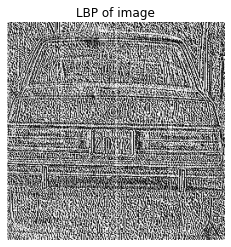

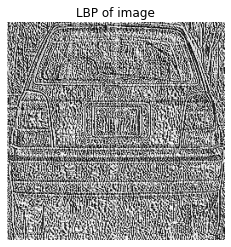

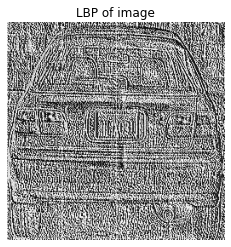

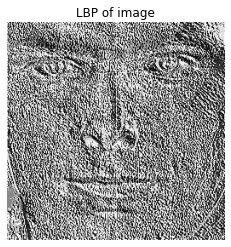

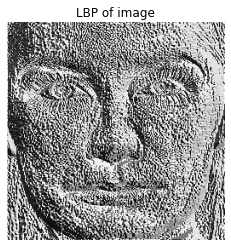

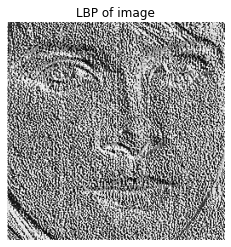

In [13]:
for image in images:
    global_lbp_descriptor = ICV_global_lbp_descriptor(image, 64, True)

In [14]:
for i, image in enumerate(images):
    print("Label for {} is ".format(dataset[i]), end = "")
    ICV_classification(image, 64)

Label for car-1.jpg is Car
Label for car-2.jpg is Car
Label for car-3.jpg is Car
Label for face-1.jpg is Face
Label for face-2.jpg is Face
Label for face-3.jpg is Face


<b>c) Decrease the window size and perform classification again. Comment the results in the report.</b>

In [15]:
for i, image in enumerate(images):
    print("Label for {} is ".format(dataset[i]), end = "")
    ICV_classification(image, 32)

Label for car-1.jpg is Car
Label for car-2.jpg is Car
Label for car-3.jpg is Car
Label for face-1.jpg is Face
Label for face-2.jpg is Face
Label for face-3.jpg is Face


In [16]:
for i, image in enumerate(images):
    print("Label for {} is ".format(dataset[i]), end = "")
    ICV_classification(image, 2)

Label for car-1.jpg is Car
Label for car-2.jpg is Car
Label for car-3.jpg is Car
Label for face-1.jpg is Face
Label for face-2.jpg is Car
Label for face-3.jpg is Face


<b>d) Increase the window size and perform classification again. Comment the results in the report.</b>

In [17]:
for i, image in enumerate(images):
    print("Label for {} is ".format(dataset[i]), end = "")
    ICV_classification(image, 128)

Label for car-1.jpg is Car
Label for car-2.jpg is Car
Label for car-3.jpg is Car
Label for face-1.jpg is Face
Label for face-2.jpg is Face
Label for face-3.jpg is Face


In [18]:
for i, image in enumerate(images):
    print("Label for {} is ".format(dataset[i]), end = "")
    ICV_classification(image, 256)

Label for car-1.jpg is Car
Label for car-2.jpg is Car
Label for car-3.jpg is Car
Label for face-1.jpg is Face
Label for face-2.jpg is Face
Label for face-3.jpg is Face
